In [30]:
M = 100 # change this value [20 or 60 or 100]
channel = 'SL' # change this [DL or SL]
dotrain = False

import os
import sys
from glob import glob
import yaml
import ROOT
import pandas as pd
import root_pandas as rpd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

No of signal processes : 1, bkg processes : 17
(774698, 30)
(193676, 30)
Train --> Sig : 110196   Bkg : 664502
Test  --> Sig : 27550    Bkg : 166126
[21:42:11] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.24945	train-auc:0.82973	train-aucpr:0.77876	train-logloss:0.68975	test-error:0.24864	test-auc:0.82820	test-aucpr:0.77729	test-logloss:0.68976
[1]	train-error:0.24708	train-auc:0.83168	train-aucpr:0.78129	train-logloss:0.68639	test-error:0.24675	test-auc:0.83015	test-aucpr:0.77980	test-logloss:0.68643
[2]	train-error:0.22897	train-auc:0.84016	train-aucpr:0.78910	train-logloss:0.68316	test-error:0.22901	test-auc:0.83879	test-aucpr:0.78782	test-logloss:0.6831

[48]	train-error:0.22202	train-auc:0.86019	train-aucpr:0.83058	train-logloss:0.57706	test-error:0.22255	test-auc:0.85887	test-aucpr:0.82963	test-logloss:0.57764
[49]	train-error:0.22217	train-auc:0.86027	train-aucpr:0.83068	train-logloss:0.57556	test-error:0.22265	test-auc:0.85895	test-aucpr:0.82972	test-logloss:0.57613
[50]	train-error:0.22204	train-auc:0.86032	train-aucpr:0.83077	train-logloss:0.57400	test-error:0.22247	test-auc:0.85901	test-aucpr:0.82981	test-logloss:0.57457
[51]	train-error:0.22184	train-auc:0.86061	train-aucpr:0.83123	train-logloss:0.57243	test-error:0.22222	test-auc:0.85931	test-aucpr:0.83040	test-logloss:0.57302
[52]	train-error:0.22197	train-auc:0.86106	train-aucpr:0.83331	train-logloss:0.57096	test-error:0.22239	test-auc:0.85971	test-aucpr:0.83185	test-logloss:0.57156
[53]	train-error:0.22133	train-auc:0.86121	train-aucpr:0.83342	train-logloss:0.56945	test-error:0.22241	test-auc:0.85988	test-aucpr:0.83200	test-logloss:0.57005
[54]	train-error:0.22130	train-auc

[99]	train-error:0.21743	train-auc:0.86669	train-aucpr:0.84150	train-logloss:0.51860	test-error:0.21854	test-auc:0.86529	test-aucpr:0.84001	test-logloss:0.51962
[100]	train-error:0.21695	train-auc:0.86682	train-aucpr:0.84166	train-logloss:0.51781	test-error:0.21847	test-auc:0.86541	test-aucpr:0.84017	test-logloss:0.51885
[101]	train-error:0.21728	train-auc:0.86684	train-aucpr:0.84165	train-logloss:0.51703	test-error:0.21865	test-auc:0.86544	test-aucpr:0.84017	test-logloss:0.51808
[102]	train-error:0.21714	train-auc:0.86687	train-aucpr:0.84171	train-logloss:0.51622	test-error:0.21857	test-auc:0.86545	test-aucpr:0.84020	test-logloss:0.51728
[103]	train-error:0.21699	train-auc:0.86699	train-aucpr:0.84187	train-logloss:0.51538	test-error:0.21833	test-auc:0.86557	test-aucpr:0.84038	test-logloss:0.51645
[104]	train-error:0.21685	train-auc:0.86701	train-aucpr:0.84189	train-logloss:0.51459	test-error:0.21833	test-auc:0.86559	test-aucpr:0.84040	test-logloss:0.51567
[105]	train-error:0.21680	tra

[150]	train-error:0.21312	train-auc:0.87056	train-aucpr:0.84654	train-logloss:0.48706	test-error:0.21504	test-auc:0.86912	test-aucpr:0.84524	test-logloss:0.48842
[151]	train-error:0.21310	train-auc:0.87065	train-aucpr:0.84662	train-logloss:0.48661	test-error:0.21489	test-auc:0.86920	test-aucpr:0.84532	test-logloss:0.48797
[152]	train-error:0.21305	train-auc:0.87074	train-aucpr:0.84670	train-logloss:0.48616	test-error:0.21499	test-auc:0.86929	test-aucpr:0.84543	test-logloss:0.48752
[153]	train-error:0.21303	train-auc:0.87079	train-aucpr:0.84675	train-logloss:0.48570	test-error:0.21492	test-auc:0.86934	test-aucpr:0.84546	test-logloss:0.48707
[154]	train-error:0.21301	train-auc:0.87087	train-aucpr:0.84684	train-logloss:0.48526	test-error:0.21488	test-auc:0.86942	test-aucpr:0.84557	test-logloss:0.48664
[155]	train-error:0.21288	train-auc:0.87095	train-aucpr:0.84698	train-logloss:0.48480	test-error:0.21477	test-auc:0.86949	test-aucpr:0.84566	test-logloss:0.48618
[156]	train-error:0.21289	tr

[201]	train-error:0.20916	train-auc:0.87391	train-aucpr:0.85057	train-logloss:0.46824	test-error:0.21135	test-auc:0.87237	test-aucpr:0.84939	test-logloss:0.46982
[202]	train-error:0.20911	train-auc:0.87403	train-aucpr:0.85071	train-logloss:0.46793	test-error:0.21133	test-auc:0.87249	test-aucpr:0.84954	test-logloss:0.46952
[203]	train-error:0.20903	train-auc:0.87410	train-aucpr:0.85081	train-logloss:0.46764	test-error:0.21118	test-auc:0.87256	test-aucpr:0.84965	test-logloss:0.46923
[204]	train-error:0.20895	train-auc:0.87416	train-aucpr:0.85087	train-logloss:0.46737	test-error:0.21105	test-auc:0.87260	test-aucpr:0.84969	test-logloss:0.46897
[205]	train-error:0.20884	train-auc:0.87427	train-aucpr:0.85097	train-logloss:0.46707	test-error:0.21096	test-auc:0.87272	test-aucpr:0.84979	test-logloss:0.46867
[206]	train-error:0.20876	train-auc:0.87430	train-aucpr:0.85103	train-logloss:0.46679	test-error:0.21088	test-auc:0.87275	test-aucpr:0.84986	test-logloss:0.46839
[207]	train-error:0.20874	tr

[252]	train-error:0.20555	train-auc:0.87750	train-aucpr:0.85479	train-logloss:0.45582	test-error:0.20771	test-auc:0.87582	test-aucpr:0.85345	test-logloss:0.45760
[253]	train-error:0.20547	train-auc:0.87756	train-aucpr:0.85490	train-logloss:0.45561	test-error:0.20763	test-auc:0.87588	test-aucpr:0.85355	test-logloss:0.45740
[254]	train-error:0.20546	train-auc:0.87762	train-aucpr:0.85496	train-logloss:0.45542	test-error:0.20755	test-auc:0.87592	test-aucpr:0.85360	test-logloss:0.45722
[255]	train-error:0.20544	train-auc:0.87769	train-aucpr:0.85506	train-logloss:0.45522	test-error:0.20726	test-auc:0.87599	test-aucpr:0.85369	test-logloss:0.45702
[256]	train-error:0.20534	train-auc:0.87776	train-aucpr:0.85513	train-logloss:0.45503	test-error:0.20719	test-auc:0.87605	test-aucpr:0.85374	test-logloss:0.45684
[257]	train-error:0.20524	train-auc:0.87783	train-aucpr:0.85525	train-logloss:0.45484	test-error:0.20711	test-auc:0.87612	test-aucpr:0.85379	test-logloss:0.45665
[258]	train-error:0.20519	tr

[303]	train-error:0.20233	train-auc:0.88054	train-aucpr:0.85836	train-logloss:0.44690	test-error:0.20438	test-auc:0.87865	test-aucpr:0.85686	test-logloss:0.44887
[304]	train-error:0.20225	train-auc:0.88058	train-aucpr:0.85840	train-logloss:0.44676	test-error:0.20429	test-auc:0.87869	test-aucpr:0.85690	test-logloss:0.44874
[305]	train-error:0.20221	train-auc:0.88063	train-aucpr:0.85847	train-logloss:0.44662	test-error:0.20414	test-auc:0.87873	test-aucpr:0.85695	test-logloss:0.44860
[306]	train-error:0.20219	train-auc:0.88069	train-aucpr:0.85855	train-logloss:0.44645	test-error:0.20408	test-auc:0.87879	test-aucpr:0.85703	test-logloss:0.44845
[307]	train-error:0.20212	train-auc:0.88072	train-aucpr:0.85858	train-logloss:0.44633	test-error:0.20408	test-auc:0.87881	test-aucpr:0.85706	test-logloss:0.44833
[308]	train-error:0.20208	train-auc:0.88077	train-aucpr:0.85864	train-logloss:0.44619	test-error:0.20408	test-auc:0.87886	test-aucpr:0.85713	test-logloss:0.44819
[309]	train-error:0.20195	tr

[354]	train-error:0.19978	train-auc:0.88331	train-aucpr:0.86162	train-logloss:0.43998	test-error:0.20189	test-auc:0.88115	test-aucpr:0.85991	test-logloss:0.44218
[355]	train-error:0.19975	train-auc:0.88334	train-aucpr:0.86166	train-logloss:0.43985	test-error:0.20195	test-auc:0.88117	test-aucpr:0.85992	test-logloss:0.44206
[356]	train-error:0.19967	train-auc:0.88341	train-aucpr:0.86172	train-logloss:0.43974	test-error:0.20180	test-auc:0.88122	test-aucpr:0.86000	test-logloss:0.44195
[357]	train-error:0.19963	train-auc:0.88343	train-aucpr:0.86175	train-logloss:0.43964	test-error:0.20184	test-auc:0.88124	test-aucpr:0.86002	test-logloss:0.44186
[358]	train-error:0.19961	train-auc:0.88348	train-aucpr:0.86181	train-logloss:0.43953	test-error:0.20176	test-auc:0.88128	test-aucpr:0.86008	test-logloss:0.44175
[359]	train-error:0.19948	train-auc:0.88362	train-aucpr:0.86198	train-logloss:0.43931	test-error:0.20160	test-auc:0.88142	test-aucpr:0.86025	test-logloss:0.44153
[360]	train-error:0.19938	tr

[405]	train-error:0.19738	train-auc:0.88571	train-aucpr:0.86450	train-logloss:0.43423	test-error:0.19961	test-auc:0.88336	test-aucpr:0.86254	test-logloss:0.43666
[406]	train-error:0.19730	train-auc:0.88579	train-aucpr:0.86457	train-logloss:0.43408	test-error:0.19961	test-auc:0.88343	test-aucpr:0.86261	test-logloss:0.43651
[407]	train-error:0.19727	train-auc:0.88582	train-aucpr:0.86461	train-logloss:0.43399	test-error:0.19962	test-auc:0.88347	test-aucpr:0.86264	test-logloss:0.43642
[408]	train-error:0.19723	train-auc:0.88586	train-aucpr:0.86466	train-logloss:0.43389	test-error:0.19958	test-auc:0.88351	test-aucpr:0.86268	test-logloss:0.43633
[409]	train-error:0.19722	train-auc:0.88589	train-aucpr:0.86470	train-logloss:0.43379	test-error:0.19960	test-auc:0.88353	test-aucpr:0.86272	test-logloss:0.43624
[410]	train-error:0.19721	train-auc:0.88592	train-aucpr:0.86474	train-logloss:0.43371	test-error:0.19958	test-auc:0.88356	test-aucpr:0.86274	test-logloss:0.43616
[411]	train-error:0.19717	tr

[456]	train-error:0.19508	train-auc:0.88788	train-aucpr:0.86702	train-logloss:0.42932	test-error:0.19785	test-auc:0.88545	test-aucpr:0.86487	test-logloss:0.43194
[457]	train-error:0.19502	train-auc:0.88795	train-aucpr:0.86710	train-logloss:0.42919	test-error:0.19778	test-auc:0.88552	test-aucpr:0.86494	test-logloss:0.43181
[458]	train-error:0.19501	train-auc:0.88797	train-aucpr:0.86711	train-logloss:0.42914	test-error:0.19772	test-auc:0.88553	test-aucpr:0.86495	test-logloss:0.43176
[459]	train-error:0.19499	train-auc:0.88801	train-aucpr:0.86716	train-logloss:0.42906	test-error:0.19774	test-auc:0.88557	test-aucpr:0.86500	test-logloss:0.43169
[460]	train-error:0.19491	train-auc:0.88810	train-aucpr:0.86726	train-logloss:0.42891	test-error:0.19760	test-auc:0.88567	test-aucpr:0.86510	test-logloss:0.43153
[461]	train-error:0.19486	train-auc:0.88812	train-aucpr:0.86729	train-logloss:0.42883	test-error:0.19762	test-auc:0.88569	test-aucpr:0.86512	test-logloss:0.43145
[462]	train-error:0.19475	tr

[507]	train-error:0.19297	train-auc:0.88982	train-aucpr:0.86927	train-logloss:0.42512	test-error:0.19605	test-auc:0.88733	test-aucpr:0.86703	test-logloss:0.42788
[508]	train-error:0.19294	train-auc:0.88984	train-aucpr:0.86930	train-logloss:0.42506	test-error:0.19603	test-auc:0.88736	test-aucpr:0.86707	test-logloss:0.42782
[509]	train-error:0.19293	train-auc:0.88986	train-aucpr:0.86932	train-logloss:0.42501	test-error:0.19605	test-auc:0.88737	test-aucpr:0.86708	test-logloss:0.42777
[510]	train-error:0.19279	train-auc:0.88993	train-aucpr:0.86940	train-logloss:0.42488	test-error:0.19596	test-auc:0.88745	test-aucpr:0.86717	test-logloss:0.42764
[511]	train-error:0.19278	train-auc:0.88997	train-aucpr:0.86945	train-logloss:0.42481	test-error:0.19587	test-auc:0.88748	test-aucpr:0.86721	test-logloss:0.42757
[512]	train-error:0.19272	train-auc:0.89001	train-aucpr:0.86951	train-logloss:0.42472	test-error:0.19590	test-auc:0.88753	test-aucpr:0.86728	test-logloss:0.42748
[513]	train-error:0.19269	tr

[558]	train-error:0.19137	train-auc:0.89135	train-aucpr:0.87111	train-logloss:0.42164	test-error:0.19448	test-auc:0.88884	test-aucpr:0.86881	test-logloss:0.42453
[559]	train-error:0.19138	train-auc:0.89136	train-aucpr:0.87113	train-logloss:0.42158	test-error:0.19445	test-auc:0.88885	test-aucpr:0.86882	test-logloss:0.42447
[560]	train-error:0.19133	train-auc:0.89140	train-aucpr:0.87118	train-logloss:0.42149	test-error:0.19440	test-auc:0.88890	test-aucpr:0.86887	test-logloss:0.42439
[561]	train-error:0.19132	train-auc:0.89142	train-aucpr:0.87120	train-logloss:0.42144	test-error:0.19436	test-auc:0.88892	test-aucpr:0.86889	test-logloss:0.42434
[562]	train-error:0.19127	train-auc:0.89145	train-aucpr:0.87123	train-logloss:0.42139	test-error:0.19441	test-auc:0.88893	test-aucpr:0.86892	test-logloss:0.42429
[563]	train-error:0.19126	train-auc:0.89147	train-aucpr:0.87125	train-logloss:0.42135	test-error:0.19435	test-auc:0.88895	test-aucpr:0.86895	test-logloss:0.42425
[564]	train-error:0.19124	tr

[609]	train-error:0.19010	train-auc:0.89253	train-aucpr:0.87256	train-logloss:0.41884	test-error:0.19361	test-auc:0.88997	test-aucpr:0.87020	test-logloss:0.42187
[610]	train-error:0.19008	train-auc:0.89254	train-aucpr:0.87257	train-logloss:0.41880	test-error:0.19360	test-auc:0.88998	test-aucpr:0.87020	test-logloss:0.42184
[611]	train-error:0.19004	train-auc:0.89258	train-aucpr:0.87261	train-logloss:0.41872	test-error:0.19342	test-auc:0.89001	test-aucpr:0.87024	test-logloss:0.42177
[612]	train-error:0.19001	train-auc:0.89260	train-aucpr:0.87264	train-logloss:0.41868	test-error:0.19340	test-auc:0.89004	test-aucpr:0.87027	test-logloss:0.42172
[613]	train-error:0.18992	train-auc:0.89267	train-aucpr:0.87270	train-logloss:0.41857	test-error:0.19331	test-auc:0.89010	test-aucpr:0.87033	test-logloss:0.42162
[614]	train-error:0.18994	train-auc:0.89269	train-aucpr:0.87272	train-logloss:0.41851	test-error:0.19329	test-auc:0.89011	test-aucpr:0.87035	test-logloss:0.42156
[615]	train-error:0.18990	tr

[660]	train-error:0.18888	train-auc:0.89362	train-aucpr:0.87383	train-logloss:0.41628	test-error:0.19240	test-auc:0.89099	test-aucpr:0.87138	test-logloss:0.41946
[661]	train-error:0.18888	train-auc:0.89363	train-aucpr:0.87384	train-logloss:0.41624	test-error:0.19244	test-auc:0.89100	test-aucpr:0.87139	test-logloss:0.41942
[662]	train-error:0.18884	train-auc:0.89367	train-aucpr:0.87387	train-logloss:0.41617	test-error:0.19245	test-auc:0.89103	test-aucpr:0.87142	test-logloss:0.41936
[663]	train-error:0.18884	train-auc:0.89369	train-aucpr:0.87390	train-logloss:0.41612	test-error:0.19228	test-auc:0.89105	test-aucpr:0.87144	test-logloss:0.41931
[664]	train-error:0.18881	train-auc:0.89371	train-aucpr:0.87393	train-logloss:0.41606	test-error:0.19233	test-auc:0.89108	test-aucpr:0.87148	test-logloss:0.41925
[665]	train-error:0.18880	train-auc:0.89373	train-aucpr:0.87394	train-logloss:0.41603	test-error:0.19237	test-auc:0.89109	test-aucpr:0.87149	test-logloss:0.41922
[666]	train-error:0.18877	tr

[711]	train-error:0.18793	train-auc:0.89457	train-aucpr:0.87490	train-logloss:0.41404	test-error:0.19130	test-auc:0.89187	test-aucpr:0.87239	test-logloss:0.41735
[712]	train-error:0.18794	train-auc:0.89458	train-aucpr:0.87491	train-logloss:0.41402	test-error:0.19121	test-auc:0.89188	test-aucpr:0.87240	test-logloss:0.41733
[713]	train-error:0.18793	train-auc:0.89459	train-aucpr:0.87492	train-logloss:0.41398	test-error:0.19126	test-auc:0.89189	test-aucpr:0.87241	test-logloss:0.41730
[714]	train-error:0.18787	train-auc:0.89461	train-aucpr:0.87496	train-logloss:0.41392	test-error:0.19127	test-auc:0.89191	test-aucpr:0.87243	test-logloss:0.41724
[715]	train-error:0.18790	train-auc:0.89463	train-aucpr:0.87497	train-logloss:0.41390	test-error:0.19118	test-auc:0.89192	test-aucpr:0.87244	test-logloss:0.41722
[716]	train-error:0.18789	train-auc:0.89463	train-aucpr:0.87498	train-logloss:0.41387	test-error:0.19111	test-auc:0.89192	test-aucpr:0.87245	test-logloss:0.41719
[717]	train-error:0.18786	tr

[762]	train-error:0.18694	train-auc:0.89545	train-aucpr:0.87592	train-logloss:0.41202	test-error:0.19016	test-auc:0.89269	test-aucpr:0.87335	test-logloss:0.41546
[763]	train-error:0.18692	train-auc:0.89546	train-aucpr:0.87594	train-logloss:0.41200	test-error:0.19015	test-auc:0.89270	test-aucpr:0.87337	test-logloss:0.41543
[764]	train-error:0.18693	train-auc:0.89547	train-aucpr:0.87594	train-logloss:0.41197	test-error:0.19013	test-auc:0.89271	test-aucpr:0.87338	test-logloss:0.41541
[765]	train-error:0.18691	train-auc:0.89549	train-aucpr:0.87596	train-logloss:0.41194	test-error:0.19014	test-auc:0.89272	test-aucpr:0.87339	test-logloss:0.41538
[766]	train-error:0.18689	train-auc:0.89550	train-aucpr:0.87597	train-logloss:0.41191	test-error:0.19014	test-auc:0.89274	test-aucpr:0.87340	test-logloss:0.41534
[767]	train-error:0.18688	train-auc:0.89551	train-aucpr:0.87599	train-logloss:0.41187	test-error:0.19013	test-auc:0.89275	test-aucpr:0.87341	test-logloss:0.41531
[768]	train-error:0.18686	tr

[813]	train-error:0.18623	train-auc:0.89622	train-aucpr:0.87678	train-logloss:0.41034	test-error:0.18930	test-auc:0.89337	test-aucpr:0.87416	test-logloss:0.41389
[814]	train-error:0.18621	train-auc:0.89623	train-aucpr:0.87679	train-logloss:0.41031	test-error:0.18930	test-auc:0.89338	test-aucpr:0.87418	test-logloss:0.41386
[815]	train-error:0.18622	train-auc:0.89625	train-aucpr:0.87681	train-logloss:0.41028	test-error:0.18928	test-auc:0.89339	test-aucpr:0.87419	test-logloss:0.41384
[816]	train-error:0.18618	train-auc:0.89627	train-aucpr:0.87683	train-logloss:0.41025	test-error:0.18922	test-auc:0.89340	test-aucpr:0.87421	test-logloss:0.41381
[817]	train-error:0.18615	train-auc:0.89627	train-aucpr:0.87684	train-logloss:0.41022	test-error:0.18927	test-auc:0.89341	test-aucpr:0.87422	test-logloss:0.41379
[818]	train-error:0.18609	train-auc:0.89636	train-aucpr:0.87695	train-logloss:0.41007	test-error:0.18918	test-auc:0.89350	test-aucpr:0.87433	test-logloss:0.41364
[819]	train-error:0.18606	tr

[864]	train-error:0.18527	train-auc:0.89710	train-aucpr:0.87781	train-logloss:0.40846	test-error:0.18831	test-auc:0.89420	test-aucpr:0.87514	test-logloss:0.41212
[865]	train-error:0.18525	train-auc:0.89712	train-aucpr:0.87782	train-logloss:0.40843	test-error:0.18844	test-auc:0.89421	test-aucpr:0.87515	test-logloss:0.41209
[866]	train-error:0.18524	train-auc:0.89713	train-aucpr:0.87783	train-logloss:0.40840	test-error:0.18845	test-auc:0.89422	test-aucpr:0.87516	test-logloss:0.41207
[867]	train-error:0.18523	train-auc:0.89714	train-aucpr:0.87784	train-logloss:0.40838	test-error:0.18843	test-auc:0.89423	test-aucpr:0.87518	test-logloss:0.41205
[868]	train-error:0.18522	train-auc:0.89716	train-aucpr:0.87786	train-logloss:0.40834	test-error:0.18834	test-auc:0.89425	test-aucpr:0.87520	test-logloss:0.41201
[869]	train-error:0.18517	train-auc:0.89719	train-aucpr:0.87789	train-logloss:0.40828	test-error:0.18831	test-auc:0.89427	test-aucpr:0.87522	test-logloss:0.41196
[870]	train-error:0.18517	tr

[915]	train-error:0.18432	train-auc:0.89785	train-aucpr:0.87866	train-logloss:0.40681	test-error:0.18739	test-auc:0.89489	test-aucpr:0.87595	test-logloss:0.41059
[916]	train-error:0.18434	train-auc:0.89786	train-aucpr:0.87868	train-logloss:0.40678	test-error:0.18736	test-auc:0.89490	test-aucpr:0.87597	test-logloss:0.41056
[917]	train-error:0.18435	train-auc:0.89788	train-aucpr:0.87870	train-logloss:0.40673	test-error:0.18737	test-auc:0.89492	test-aucpr:0.87598	test-logloss:0.41052
[918]	train-error:0.18430	train-auc:0.89789	train-aucpr:0.87871	train-logloss:0.40670	test-error:0.18739	test-auc:0.89493	test-aucpr:0.87599	test-logloss:0.41049
[919]	train-error:0.18430	train-auc:0.89790	train-aucpr:0.87872	train-logloss:0.40669	test-error:0.18737	test-auc:0.89494	test-aucpr:0.87600	test-logloss:0.41047
[920]	train-error:0.18432	train-auc:0.89791	train-aucpr:0.87874	train-logloss:0.40666	test-error:0.18737	test-auc:0.89494	test-aucpr:0.87601	test-logloss:0.41045
[921]	train-error:0.18435	tr

[966]	train-error:0.18360	train-auc:0.89860	train-aucpr:0.87956	train-logloss:0.40518	test-error:0.18671	test-auc:0.89560	test-aucpr:0.87680	test-logloss:0.40906
[967]	train-error:0.18361	train-auc:0.89861	train-aucpr:0.87957	train-logloss:0.40516	test-error:0.18674	test-auc:0.89561	test-aucpr:0.87681	test-logloss:0.40905
[968]	train-error:0.18359	train-auc:0.89863	train-aucpr:0.87958	train-logloss:0.40514	test-error:0.18670	test-auc:0.89562	test-aucpr:0.87683	test-logloss:0.40902
[969]	train-error:0.18357	train-auc:0.89865	train-aucpr:0.87960	train-logloss:0.40509	test-error:0.18672	test-auc:0.89564	test-aucpr:0.87684	test-logloss:0.40898
[970]	train-error:0.18354	train-auc:0.89867	train-aucpr:0.87963	train-logloss:0.40505	test-error:0.18667	test-auc:0.89565	test-aucpr:0.87687	test-logloss:0.40894
[971]	train-error:0.18358	train-auc:0.89868	train-aucpr:0.87965	train-logloss:0.40502	test-error:0.18661	test-auc:0.89567	test-aucpr:0.87689	test-logloss:0.40891
[972]	train-error:0.18354	tr

[1017]	train-error:0.18300	train-auc:0.89921	train-aucpr:0.88025	train-logloss:0.40386	test-error:0.18601	test-auc:0.89614	test-aucpr:0.87745	test-logloss:0.40784
[1018]	train-error:0.18297	train-auc:0.89922	train-aucpr:0.88026	train-logloss:0.40384	test-error:0.18599	test-auc:0.89615	test-aucpr:0.87746	test-logloss:0.40782
[1019]	train-error:0.18295	train-auc:0.89923	train-aucpr:0.88027	train-logloss:0.40381	test-error:0.18597	test-auc:0.89617	test-aucpr:0.87748	test-logloss:0.40780
[1020]	train-error:0.18295	train-auc:0.89924	train-aucpr:0.88029	train-logloss:0.40377	test-error:0.18591	test-auc:0.89618	test-aucpr:0.87750	test-logloss:0.40776
[1021]	train-error:0.18290	train-auc:0.89927	train-aucpr:0.88032	train-logloss:0.40373	test-error:0.18584	test-auc:0.89621	test-aucpr:0.87752	test-logloss:0.40772
[1022]	train-error:0.18283	train-auc:0.89928	train-aucpr:0.88033	train-logloss:0.40370	test-error:0.18583	test-auc:0.89622	test-aucpr:0.87753	test-logloss:0.40770
[1023]	train-error:0.1

[1068]	train-error:0.18222	train-auc:0.89980	train-aucpr:0.88095	train-logloss:0.40258	test-error:0.18517	test-auc:0.89671	test-aucpr:0.87811	test-logloss:0.40667
[1069]	train-error:0.18222	train-auc:0.89981	train-aucpr:0.88096	train-logloss:0.40256	test-error:0.18519	test-auc:0.89671	test-aucpr:0.87812	test-logloss:0.40665
[1070]	train-error:0.18220	train-auc:0.89982	train-aucpr:0.88096	train-logloss:0.40254	test-error:0.18513	test-auc:0.89672	test-aucpr:0.87812	test-logloss:0.40664
[1071]	train-error:0.18216	train-auc:0.89983	train-aucpr:0.88098	train-logloss:0.40252	test-error:0.18515	test-auc:0.89673	test-aucpr:0.87814	test-logloss:0.40662
[1072]	train-error:0.18219	train-auc:0.89984	train-aucpr:0.88098	train-logloss:0.40249	test-error:0.18515	test-auc:0.89674	test-aucpr:0.87814	test-logloss:0.40659
[1073]	train-error:0.18218	train-auc:0.89984	train-aucpr:0.88099	train-logloss:0.40248	test-error:0.18510	test-auc:0.89674	test-aucpr:0.87814	test-logloss:0.40659
[1074]	train-error:0.1

[1119]	train-error:0.18167	train-auc:0.90029	train-aucpr:0.88150	train-logloss:0.40149	test-error:0.18450	test-auc:0.89716	test-aucpr:0.87863	test-logloss:0.40568
[1120]	train-error:0.18168	train-auc:0.90029	train-aucpr:0.88151	train-logloss:0.40148	test-error:0.18448	test-auc:0.89717	test-aucpr:0.87864	test-logloss:0.40566
[1121]	train-error:0.18165	train-auc:0.90032	train-aucpr:0.88155	train-logloss:0.40143	test-error:0.18438	test-auc:0.89719	test-aucpr:0.87867	test-logloss:0.40562
[1122]	train-error:0.18166	train-auc:0.90033	train-aucpr:0.88157	train-logloss:0.40140	test-error:0.18442	test-auc:0.89720	test-aucpr:0.87869	test-logloss:0.40559
[1123]	train-error:0.18163	train-auc:0.90036	train-aucpr:0.88159	train-logloss:0.40136	test-error:0.18431	test-auc:0.89723	test-aucpr:0.87872	test-logloss:0.40555
[1124]	train-error:0.18161	train-auc:0.90036	train-aucpr:0.88160	train-logloss:0.40134	test-error:0.18433	test-auc:0.89723	test-aucpr:0.87872	test-logloss:0.40553
[1125]	train-error:0.1

[1170]	train-error:0.18116	train-auc:0.90084	train-aucpr:0.88217	train-logloss:0.40031	test-error:0.18377	test-auc:0.89768	test-aucpr:0.87927	test-logloss:0.40458
[1171]	train-error:0.18116	train-auc:0.90084	train-aucpr:0.88217	train-logloss:0.40030	test-error:0.18372	test-auc:0.89768	test-aucpr:0.87928	test-logloss:0.40457
[1172]	train-error:0.18115	train-auc:0.90085	train-aucpr:0.88218	train-logloss:0.40029	test-error:0.18373	test-auc:0.89768	test-aucpr:0.87928	test-logloss:0.40455
[1173]	train-error:0.18115	train-auc:0.90086	train-aucpr:0.88218	train-logloss:0.40026	test-error:0.18368	test-auc:0.89769	test-aucpr:0.87929	test-logloss:0.40453
[1174]	train-error:0.18109	train-auc:0.90087	train-aucpr:0.88220	train-logloss:0.40024	test-error:0.18371	test-auc:0.89770	test-aucpr:0.87931	test-logloss:0.40451
[1175]	train-error:0.18109	train-auc:0.90088	train-aucpr:0.88221	train-logloss:0.40022	test-error:0.18371	test-auc:0.89771	test-aucpr:0.87931	test-logloss:0.40449
[1176]	train-error:0.1

[1221]	train-error:0.18067	train-auc:0.90120	train-aucpr:0.88261	train-logloss:0.39943	test-error:0.18307	test-auc:0.89803	test-aucpr:0.87969	test-logloss:0.40379
[1222]	train-error:0.18067	train-auc:0.90121	train-aucpr:0.88262	train-logloss:0.39941	test-error:0.18307	test-auc:0.89803	test-aucpr:0.87970	test-logloss:0.40377
[1223]	train-error:0.18067	train-auc:0.90123	train-aucpr:0.88263	train-logloss:0.39939	test-error:0.18308	test-auc:0.89805	test-aucpr:0.87971	test-logloss:0.40375
[1224]	train-error:0.18063	train-auc:0.90123	train-aucpr:0.88264	train-logloss:0.39937	test-error:0.18311	test-auc:0.89805	test-aucpr:0.87972	test-logloss:0.40374
[1225]	train-error:0.18061	train-auc:0.90124	train-aucpr:0.88265	train-logloss:0.39935	test-error:0.18309	test-auc:0.89806	test-aucpr:0.87972	test-logloss:0.40372
[1226]	train-error:0.18063	train-auc:0.90124	train-aucpr:0.88266	train-logloss:0.39933	test-error:0.18310	test-auc:0.89806	test-aucpr:0.87974	test-logloss:0.40370
[1227]	train-error:0.1

[1272]	train-error:0.18019	train-auc:0.90160	train-aucpr:0.88306	train-logloss:0.39857	test-error:0.18251	test-auc:0.89837	test-aucpr:0.88010	test-logloss:0.40302
[1273]	train-error:0.18020	train-auc:0.90160	train-aucpr:0.88307	train-logloss:0.39855	test-error:0.18240	test-auc:0.89838	test-aucpr:0.88011	test-logloss:0.40300
[1274]	train-error:0.18019	train-auc:0.90161	train-aucpr:0.88308	train-logloss:0.39854	test-error:0.18239	test-auc:0.89839	test-aucpr:0.88012	test-logloss:0.40299
[1275]	train-error:0.18017	train-auc:0.90161	train-aucpr:0.88308	train-logloss:0.39853	test-error:0.18237	test-auc:0.89839	test-aucpr:0.88012	test-logloss:0.40298
[1276]	train-error:0.18018	train-auc:0.90162	train-aucpr:0.88309	train-logloss:0.39851	test-error:0.18236	test-auc:0.89840	test-aucpr:0.88013	test-logloss:0.40296
[1277]	train-error:0.18013	train-auc:0.90163	train-aucpr:0.88310	train-logloss:0.39849	test-error:0.18242	test-auc:0.89841	test-aucpr:0.88014	test-logloss:0.40295
[1278]	train-error:0.1

[1323]	train-error:0.17980	train-auc:0.90197	train-aucpr:0.88350	train-logloss:0.39774	test-error:0.18182	test-auc:0.89870	test-aucpr:0.88050	test-logloss:0.40229
[1324]	train-error:0.17977	train-auc:0.90198	train-aucpr:0.88351	train-logloss:0.39772	test-error:0.18183	test-auc:0.89870	test-aucpr:0.88051	test-logloss:0.40227
[1325]	train-error:0.17977	train-auc:0.90198	train-aucpr:0.88352	train-logloss:0.39771	test-error:0.18184	test-auc:0.89871	test-aucpr:0.88051	test-logloss:0.40226
[1326]	train-error:0.17975	train-auc:0.90199	train-aucpr:0.88352	train-logloss:0.39770	test-error:0.18188	test-auc:0.89871	test-aucpr:0.88052	test-logloss:0.40225
[1327]	train-error:0.17976	train-auc:0.90199	train-aucpr:0.88353	train-logloss:0.39768	test-error:0.18183	test-auc:0.89872	test-aucpr:0.88053	test-logloss:0.40224
[1328]	train-error:0.17974	train-auc:0.90202	train-aucpr:0.88356	train-logloss:0.39764	test-error:0.18179	test-auc:0.89874	test-aucpr:0.88056	test-logloss:0.40220
[1329]	train-error:0.1

[1374]	train-error:0.17931	train-auc:0.90234	train-aucpr:0.88393	train-logloss:0.39693	test-error:0.18149	test-auc:0.89903	test-aucpr:0.88090	test-logloss:0.40156
[1375]	train-error:0.17930	train-auc:0.90234	train-aucpr:0.88393	train-logloss:0.39693	test-error:0.18149	test-auc:0.89903	test-aucpr:0.88091	test-logloss:0.40155
[1376]	train-error:0.17932	train-auc:0.90235	train-aucpr:0.88394	train-logloss:0.39691	test-error:0.18147	test-auc:0.89904	test-aucpr:0.88092	test-logloss:0.40154
[1377]	train-error:0.17931	train-auc:0.90236	train-aucpr:0.88395	train-logloss:0.39690	test-error:0.18144	test-auc:0.89904	test-aucpr:0.88093	test-logloss:0.40153
[1378]	train-error:0.17930	train-auc:0.90237	train-aucpr:0.88396	train-logloss:0.39689	test-error:0.18138	test-auc:0.89905	test-aucpr:0.88093	test-logloss:0.40152
[1379]	train-error:0.17931	train-auc:0.90236	train-aucpr:0.88396	train-logloss:0.39688	test-error:0.18139	test-auc:0.89905	test-aucpr:0.88093	test-logloss:0.40151
[1380]	train-error:0.1

[1425]	train-error:0.17885	train-auc:0.90266	train-aucpr:0.88430	train-logloss:0.39622	test-error:0.18099	test-auc:0.89932	test-aucpr:0.88125	test-logloss:0.40094
[1426]	train-error:0.17883	train-auc:0.90267	train-aucpr:0.88431	train-logloss:0.39621	test-error:0.18100	test-auc:0.89933	test-aucpr:0.88125	test-logloss:0.40093
[1427]	train-error:0.17883	train-auc:0.90267	train-aucpr:0.88431	train-logloss:0.39620	test-error:0.18099	test-auc:0.89933	test-aucpr:0.88125	test-logloss:0.40093
[1428]	train-error:0.17881	train-auc:0.90268	train-aucpr:0.88431	train-logloss:0.39619	test-error:0.18091	test-auc:0.89934	test-aucpr:0.88126	test-logloss:0.40091
[1429]	train-error:0.17881	train-auc:0.90268	train-aucpr:0.88432	train-logloss:0.39618	test-error:0.18090	test-auc:0.89934	test-aucpr:0.88126	test-logloss:0.40091
[1430]	train-error:0.17878	train-auc:0.90269	train-aucpr:0.88433	train-logloss:0.39617	test-error:0.18089	test-auc:0.89934	test-aucpr:0.88127	test-logloss:0.40090
[1431]	train-error:0.1

[1476]	train-error:0.17856	train-auc:0.90296	train-aucpr:0.88465	train-logloss:0.39555	test-error:0.18067	test-auc:0.89959	test-aucpr:0.88157	test-logloss:0.40034
[1477]	train-error:0.17857	train-auc:0.90297	train-aucpr:0.88466	train-logloss:0.39553	test-error:0.18067	test-auc:0.89960	test-aucpr:0.88158	test-logloss:0.40032
[1478]	train-error:0.17856	train-auc:0.90298	train-aucpr:0.88466	train-logloss:0.39552	test-error:0.18064	test-auc:0.89960	test-aucpr:0.88158	test-logloss:0.40031
[1479]	train-error:0.17854	train-auc:0.90298	train-aucpr:0.88467	train-logloss:0.39551	test-error:0.18062	test-auc:0.89961	test-aucpr:0.88159	test-logloss:0.40030
[1480]	train-error:0.17853	train-auc:0.90298	train-aucpr:0.88467	train-logloss:0.39549	test-error:0.18059	test-auc:0.89961	test-aucpr:0.88159	test-logloss:0.40029
[1481]	train-error:0.17857	train-auc:0.90299	train-aucpr:0.88468	train-logloss:0.39548	test-error:0.18057	test-auc:0.89962	test-aucpr:0.88160	test-logloss:0.40029
[1482]	train-error:0.1

[1527]	train-error:0.17818	train-auc:0.90325	train-aucpr:0.88497	train-logloss:0.39490	test-error:0.18034	test-auc:0.89984	test-aucpr:0.88187	test-logloss:0.39977
[1528]	train-error:0.17818	train-auc:0.90326	train-aucpr:0.88498	train-logloss:0.39489	test-error:0.18029	test-auc:0.89984	test-aucpr:0.88188	test-logloss:0.39976
[1529]	train-error:0.17821	train-auc:0.90326	train-aucpr:0.88499	train-logloss:0.39488	test-error:0.18031	test-auc:0.89984	test-aucpr:0.88188	test-logloss:0.39975
[1530]	train-error:0.17820	train-auc:0.90327	train-aucpr:0.88499	train-logloss:0.39487	test-error:0.18027	test-auc:0.89985	test-aucpr:0.88189	test-logloss:0.39974
[1531]	train-error:0.17818	train-auc:0.90327	train-aucpr:0.88499	train-logloss:0.39486	test-error:0.18027	test-auc:0.89985	test-aucpr:0.88189	test-logloss:0.39974
[1532]	train-error:0.17821	train-auc:0.90328	train-aucpr:0.88500	train-logloss:0.39485	test-error:0.18027	test-auc:0.89985	test-aucpr:0.88190	test-logloss:0.39973
[1533]	train-error:0.1

[1578]	train-error:0.17800	train-auc:0.90350	train-aucpr:0.88527	train-logloss:0.39433	test-error:0.17998	test-auc:0.90005	test-aucpr:0.88213	test-logloss:0.39930
[1579]	train-error:0.17798	train-auc:0.90350	train-aucpr:0.88528	train-logloss:0.39431	test-error:0.17997	test-auc:0.90006	test-aucpr:0.88213	test-logloss:0.39929
[1580]	train-error:0.17797	train-auc:0.90350	train-aucpr:0.88528	train-logloss:0.39430	test-error:0.18000	test-auc:0.90006	test-aucpr:0.88214	test-logloss:0.39928
[1581]	train-error:0.17800	train-auc:0.90351	train-aucpr:0.88529	train-logloss:0.39430	test-error:0.17999	test-auc:0.90006	test-aucpr:0.88214	test-logloss:0.39927
[1582]	train-error:0.17799	train-auc:0.90351	train-aucpr:0.88529	train-logloss:0.39428	test-error:0.17999	test-auc:0.90007	test-aucpr:0.88214	test-logloss:0.39927
[1583]	train-error:0.17797	train-auc:0.90352	train-aucpr:0.88530	train-logloss:0.39428	test-error:0.17998	test-auc:0.90007	test-aucpr:0.88214	test-logloss:0.39926
[1584]	train-error:0.1

[1629]	train-error:0.17769	train-auc:0.90375	train-aucpr:0.88557	train-logloss:0.39377	test-error:0.17980	test-auc:0.90026	test-aucpr:0.88238	test-logloss:0.39883
[1630]	train-error:0.17769	train-auc:0.90376	train-aucpr:0.88557	train-logloss:0.39376	test-error:0.17975	test-auc:0.90027	test-aucpr:0.88238	test-logloss:0.39882
[1631]	train-error:0.17771	train-auc:0.90376	train-aucpr:0.88558	train-logloss:0.39375	test-error:0.17971	test-auc:0.90028	test-aucpr:0.88239	test-logloss:0.39881
[1632]	train-error:0.17769	train-auc:0.90376	train-aucpr:0.88558	train-logloss:0.39374	test-error:0.17972	test-auc:0.90028	test-aucpr:0.88239	test-logloss:0.39881
[1633]	train-error:0.17769	train-auc:0.90377	train-aucpr:0.88559	train-logloss:0.39373	test-error:0.17971	test-auc:0.90028	test-aucpr:0.88240	test-logloss:0.39880
[1634]	train-error:0.17769	train-auc:0.90377	train-aucpr:0.88560	train-logloss:0.39372	test-error:0.17973	test-auc:0.90028	test-aucpr:0.88240	test-logloss:0.39879
[1635]	train-error:0.1

[1680]	train-error:0.17747	train-auc:0.90396	train-aucpr:0.88579	train-logloss:0.39329	test-error:0.17943	test-auc:0.90043	test-aucpr:0.88257	test-logloss:0.39844
[1681]	train-error:0.17747	train-auc:0.90396	train-aucpr:0.88580	train-logloss:0.39329	test-error:0.17943	test-auc:0.90043	test-aucpr:0.88257	test-logloss:0.39844
[1682]	train-error:0.17747	train-auc:0.90397	train-aucpr:0.88580	train-logloss:0.39328	test-error:0.17945	test-auc:0.90043	test-aucpr:0.88257	test-logloss:0.39843
[1683]	train-error:0.17746	train-auc:0.90397	train-aucpr:0.88580	train-logloss:0.39327	test-error:0.17949	test-auc:0.90044	test-aucpr:0.88258	test-logloss:0.39843
[1684]	train-error:0.17745	train-auc:0.90397	train-aucpr:0.88581	train-logloss:0.39327	test-error:0.17944	test-auc:0.90044	test-aucpr:0.88258	test-logloss:0.39843
[1685]	train-error:0.17746	train-auc:0.90397	train-aucpr:0.88581	train-logloss:0.39326	test-error:0.17939	test-auc:0.90044	test-aucpr:0.88258	test-logloss:0.39842
[1686]	train-error:0.1

[1731]	train-error:0.17724	train-auc:0.90418	train-aucpr:0.88604	train-logloss:0.39281	test-error:0.17930	test-auc:0.90061	test-aucpr:0.88277	test-logloss:0.39805
[1732]	train-error:0.17725	train-auc:0.90419	train-aucpr:0.88604	train-logloss:0.39281	test-error:0.17930	test-auc:0.90061	test-aucpr:0.88278	test-logloss:0.39804
[1733]	train-error:0.17725	train-auc:0.90419	train-aucpr:0.88605	train-logloss:0.39280	test-error:0.17927	test-auc:0.90061	test-aucpr:0.88278	test-logloss:0.39804
[1734]	train-error:0.17722	train-auc:0.90419	train-aucpr:0.88605	train-logloss:0.39279	test-error:0.17928	test-auc:0.90062	test-aucpr:0.88279	test-logloss:0.39803
[1735]	train-error:0.17723	train-auc:0.90419	train-aucpr:0.88606	train-logloss:0.39278	test-error:0.17933	test-auc:0.90062	test-aucpr:0.88279	test-logloss:0.39803
[1736]	train-error:0.17723	train-auc:0.90420	train-aucpr:0.88606	train-logloss:0.39278	test-error:0.17931	test-auc:0.90062	test-aucpr:0.88279	test-logloss:0.39802
[1737]	train-error:0.1

[1782]	train-error:0.17707	train-auc:0.90437	train-aucpr:0.88625	train-logloss:0.39238	test-error:0.17909	test-auc:0.90076	test-aucpr:0.88294	test-logloss:0.39771
[1783]	train-error:0.17705	train-auc:0.90438	train-aucpr:0.88626	train-logloss:0.39237	test-error:0.17911	test-auc:0.90076	test-aucpr:0.88295	test-logloss:0.39770
[1784]	train-error:0.17704	train-auc:0.90438	train-aucpr:0.88626	train-logloss:0.39236	test-error:0.17912	test-auc:0.90077	test-aucpr:0.88296	test-logloss:0.39770
[1785]	train-error:0.17706	train-auc:0.90438	train-aucpr:0.88627	train-logloss:0.39235	test-error:0.17911	test-auc:0.90078	test-aucpr:0.88296	test-logloss:0.39768
[1786]	train-error:0.17707	train-auc:0.90439	train-aucpr:0.88628	train-logloss:0.39234	test-error:0.17911	test-auc:0.90078	test-aucpr:0.88297	test-logloss:0.39768
[1787]	train-error:0.17706	train-auc:0.90439	train-aucpr:0.88628	train-logloss:0.39233	test-error:0.17908	test-auc:0.90078	test-aucpr:0.88297	test-logloss:0.39767
[1788]	train-error:0.1

[1833]	train-error:0.17687	train-auc:0.90456	train-aucpr:0.88648	train-logloss:0.39193	test-error:0.17878	test-auc:0.90092	test-aucpr:0.88313	test-logloss:0.39736
[1834]	train-error:0.17688	train-auc:0.90457	train-aucpr:0.88648	train-logloss:0.39193	test-error:0.17879	test-auc:0.90092	test-aucpr:0.88313	test-logloss:0.39735
[1835]	train-error:0.17686	train-auc:0.90457	train-aucpr:0.88648	train-logloss:0.39192	test-error:0.17876	test-auc:0.90093	test-aucpr:0.88314	test-logloss:0.39734
[1836]	train-error:0.17688	train-auc:0.90457	train-aucpr:0.88648	train-logloss:0.39191	test-error:0.17880	test-auc:0.90093	test-aucpr:0.88314	test-logloss:0.39734
[1837]	train-error:0.17685	train-auc:0.90458	train-aucpr:0.88649	train-logloss:0.39190	test-error:0.17880	test-auc:0.90093	test-aucpr:0.88314	test-logloss:0.39733
[1838]	train-error:0.17686	train-auc:0.90458	train-aucpr:0.88650	train-logloss:0.39189	test-error:0.17879	test-auc:0.90093	test-aucpr:0.88314	test-logloss:0.39733
[1839]	train-error:0.1

[1884]	train-error:0.17669	train-auc:0.90477	train-aucpr:0.88670	train-logloss:0.39150	test-error:0.17856	test-auc:0.90107	test-aucpr:0.88331	test-logloss:0.39702
[1885]	train-error:0.17666	train-auc:0.90477	train-aucpr:0.88670	train-logloss:0.39149	test-error:0.17854	test-auc:0.90108	test-aucpr:0.88331	test-logloss:0.39701
[1886]	train-error:0.17666	train-auc:0.90477	train-aucpr:0.88671	train-logloss:0.39149	test-error:0.17852	test-auc:0.90108	test-aucpr:0.88331	test-logloss:0.39701
[1887]	train-error:0.17667	train-auc:0.90478	train-aucpr:0.88672	train-logloss:0.39147	test-error:0.17844	test-auc:0.90109	test-aucpr:0.88333	test-logloss:0.39699
[1888]	train-error:0.17665	train-auc:0.90478	train-aucpr:0.88672	train-logloss:0.39146	test-error:0.17848	test-auc:0.90109	test-aucpr:0.88333	test-logloss:0.39698
[1889]	train-error:0.17665	train-auc:0.90478	train-aucpr:0.88673	train-logloss:0.39145	test-error:0.17847	test-auc:0.90109	test-aucpr:0.88333	test-logloss:0.39698
[1890]	train-error:0.1

[1935]	train-error:0.17642	train-auc:0.90497	train-aucpr:0.88693	train-logloss:0.39106	test-error:0.17840	test-auc:0.90123	test-aucpr:0.88349	test-logloss:0.39667
[1936]	train-error:0.17641	train-auc:0.90497	train-aucpr:0.88693	train-logloss:0.39105	test-error:0.17841	test-auc:0.90123	test-aucpr:0.88349	test-logloss:0.39666
[1937]	train-error:0.17635	train-auc:0.90502	train-aucpr:0.88699	train-logloss:0.39097	test-error:0.17833	test-auc:0.90128	test-aucpr:0.88355	test-logloss:0.39658
[1938]	train-error:0.17635	train-auc:0.90502	train-aucpr:0.88700	train-logloss:0.39096	test-error:0.17836	test-auc:0.90128	test-aucpr:0.88355	test-logloss:0.39657
[1939]	train-error:0.17638	train-auc:0.90502	train-aucpr:0.88700	train-logloss:0.39095	test-error:0.17830	test-auc:0.90129	test-aucpr:0.88356	test-logloss:0.39657
[1940]	train-error:0.17637	train-auc:0.90503	train-aucpr:0.88701	train-logloss:0.39094	test-error:0.17834	test-auc:0.90129	test-aucpr:0.88357	test-logloss:0.39655
[1941]	train-error:0.1

[1986]	train-error:0.17622	train-auc:0.90518	train-aucpr:0.88719	train-logloss:0.39059	test-error:0.17824	test-auc:0.90143	test-aucpr:0.88371	test-logloss:0.39628
[1987]	train-error:0.17622	train-auc:0.90519	train-aucpr:0.88719	train-logloss:0.39058	test-error:0.17822	test-auc:0.90143	test-aucpr:0.88371	test-logloss:0.39627
[1988]	train-error:0.17619	train-auc:0.90519	train-aucpr:0.88719	train-logloss:0.39058	test-error:0.17825	test-auc:0.90143	test-aucpr:0.88371	test-logloss:0.39627
[1989]	train-error:0.17618	train-auc:0.90519	train-aucpr:0.88720	train-logloss:0.39057	test-error:0.17828	test-auc:0.90144	test-aucpr:0.88372	test-logloss:0.39626
[1990]	train-error:0.17617	train-auc:0.90519	train-aucpr:0.88721	train-logloss:0.39056	test-error:0.17831	test-auc:0.90144	test-aucpr:0.88372	test-logloss:0.39626
[1991]	train-error:0.17614	train-auc:0.90520	train-aucpr:0.88721	train-logloss:0.39055	test-error:0.17827	test-auc:0.90144	test-aucpr:0.88373	test-logloss:0.39625
[1992]	train-error:0.1

[2037]	train-error:0.17602	train-auc:0.90535	train-aucpr:0.88739	train-logloss:0.39020	test-error:0.17808	test-auc:0.90156	test-aucpr:0.88388	test-logloss:0.39597
[2038]	train-error:0.17604	train-auc:0.90536	train-aucpr:0.88739	train-logloss:0.39020	test-error:0.17804	test-auc:0.90156	test-aucpr:0.88388	test-logloss:0.39596
[2039]	train-error:0.17604	train-auc:0.90536	train-aucpr:0.88739	train-logloss:0.39019	test-error:0.17810	test-auc:0.90157	test-aucpr:0.88388	test-logloss:0.39596
[2040]	train-error:0.17605	train-auc:0.90536	train-aucpr:0.88740	train-logloss:0.39018	test-error:0.17804	test-auc:0.90157	test-aucpr:0.88389	test-logloss:0.39595
[2041]	train-error:0.17605	train-auc:0.90537	train-aucpr:0.88740	train-logloss:0.39017	test-error:0.17807	test-auc:0.90158	test-aucpr:0.88389	test-logloss:0.39594
[2042]	train-error:0.17603	train-auc:0.90537	train-aucpr:0.88741	train-logloss:0.39017	test-error:0.17805	test-auc:0.90158	test-aucpr:0.88389	test-logloss:0.39594
[2043]	train-error:0.1

[2088]	train-error:0.17587	train-auc:0.90552	train-aucpr:0.88758	train-logloss:0.38983	test-error:0.17811	test-auc:0.90170	test-aucpr:0.88403	test-logloss:0.39567
[2089]	train-error:0.17586	train-auc:0.90552	train-aucpr:0.88758	train-logloss:0.38983	test-error:0.17811	test-auc:0.90170	test-aucpr:0.88403	test-logloss:0.39567
[2090]	train-error:0.17586	train-auc:0.90553	train-aucpr:0.88759	train-logloss:0.38982	test-error:0.17813	test-auc:0.90171	test-aucpr:0.88404	test-logloss:0.39566
[2091]	train-error:0.17587	train-auc:0.90553	train-aucpr:0.88759	train-logloss:0.38981	test-error:0.17811	test-auc:0.90171	test-aucpr:0.88404	test-logloss:0.39565
[2092]	train-error:0.17586	train-auc:0.90554	train-aucpr:0.88759	train-logloss:0.38980	test-error:0.17808	test-auc:0.90171	test-aucpr:0.88404	test-logloss:0.39564
[2093]	train-error:0.17586	train-auc:0.90554	train-aucpr:0.88760	train-logloss:0.38979	test-error:0.17811	test-auc:0.90172	test-aucpr:0.88405	test-logloss:0.39564
[2094]	train-error:0.1

[2139]	train-error:0.17571	train-auc:0.90573	train-aucpr:0.88782	train-logloss:0.38941	test-error:0.17793	test-auc:0.90186	test-aucpr:0.88423	test-logloss:0.39533
[2140]	train-error:0.17570	train-auc:0.90573	train-aucpr:0.88782	train-logloss:0.38940	test-error:0.17792	test-auc:0.90186	test-aucpr:0.88423	test-logloss:0.39532
[2141]	train-error:0.17571	train-auc:0.90573	train-aucpr:0.88782	train-logloss:0.38940	test-error:0.17791	test-auc:0.90186	test-aucpr:0.88423	test-logloss:0.39532
[2142]	train-error:0.17570	train-auc:0.90573	train-aucpr:0.88783	train-logloss:0.38939	test-error:0.17792	test-auc:0.90187	test-aucpr:0.88424	test-logloss:0.39532
[2143]	train-error:0.17569	train-auc:0.90573	train-aucpr:0.88783	train-logloss:0.38938	test-error:0.17791	test-auc:0.90187	test-aucpr:0.88424	test-logloss:0.39532
[2144]	train-error:0.17568	train-auc:0.90574	train-aucpr:0.88784	train-logloss:0.38937	test-error:0.17786	test-auc:0.90187	test-aucpr:0.88425	test-logloss:0.39531
[2145]	train-error:0.1

[2190]	train-error:0.17554	train-auc:0.90589	train-aucpr:0.88802	train-logloss:0.38903	test-error:0.17779	test-auc:0.90200	test-aucpr:0.88439	test-logloss:0.39503
[2191]	train-error:0.17553	train-auc:0.90589	train-aucpr:0.88802	train-logloss:0.38902	test-error:0.17779	test-auc:0.90200	test-aucpr:0.88439	test-logloss:0.39503
[2192]	train-error:0.17553	train-auc:0.90590	train-aucpr:0.88803	train-logloss:0.38901	test-error:0.17782	test-auc:0.90200	test-aucpr:0.88440	test-logloss:0.39502
[2193]	train-error:0.17552	train-auc:0.90590	train-aucpr:0.88803	train-logloss:0.38901	test-error:0.17780	test-auc:0.90200	test-aucpr:0.88440	test-logloss:0.39502
[2194]	train-error:0.17552	train-auc:0.90590	train-aucpr:0.88803	train-logloss:0.38901	test-error:0.17780	test-auc:0.90200	test-aucpr:0.88440	test-logloss:0.39502
[2195]	train-error:0.17551	train-auc:0.90590	train-aucpr:0.88803	train-logloss:0.38900	test-error:0.17778	test-auc:0.90201	test-aucpr:0.88440	test-logloss:0.39501
[2196]	train-error:0.1

[2241]	train-error:0.17522	train-auc:0.90614	train-aucpr:0.88832	train-logloss:0.38850	test-error:0.17756	test-auc:0.90224	test-aucpr:0.88467	test-logloss:0.39457
[2242]	train-error:0.17522	train-auc:0.90614	train-aucpr:0.88833	train-logloss:0.38849	test-error:0.17758	test-auc:0.90224	test-aucpr:0.88467	test-logloss:0.39457
[2243]	train-error:0.17522	train-auc:0.90615	train-aucpr:0.88833	train-logloss:0.38849	test-error:0.17759	test-auc:0.90224	test-aucpr:0.88467	test-logloss:0.39457
[2244]	train-error:0.17523	train-auc:0.90615	train-aucpr:0.88833	train-logloss:0.38848	test-error:0.17757	test-auc:0.90224	test-aucpr:0.88468	test-logloss:0.39456
[2245]	train-error:0.17519	train-auc:0.90615	train-aucpr:0.88834	train-logloss:0.38847	test-error:0.17754	test-auc:0.90225	test-aucpr:0.88468	test-logloss:0.39455
[2246]	train-error:0.17519	train-auc:0.90616	train-aucpr:0.88835	train-logloss:0.38846	test-error:0.17748	test-auc:0.90225	test-aucpr:0.88469	test-logloss:0.39454
[2247]	train-error:0.1

[2292]	train-error:0.17500	train-auc:0.90632	train-aucpr:0.88853	train-logloss:0.38811	test-error:0.17732	test-auc:0.90238	test-aucpr:0.88485	test-logloss:0.39426
[2293]	train-error:0.17499	train-auc:0.90632	train-aucpr:0.88854	train-logloss:0.38809	test-error:0.17732	test-auc:0.90239	test-aucpr:0.88486	test-logloss:0.39425
[2294]	train-error:0.17500	train-auc:0.90633	train-aucpr:0.88855	train-logloss:0.38808	test-error:0.17735	test-auc:0.90240	test-aucpr:0.88486	test-logloss:0.39424
[2295]	train-error:0.17500	train-auc:0.90633	train-aucpr:0.88855	train-logloss:0.38808	test-error:0.17738	test-auc:0.90240	test-aucpr:0.88487	test-logloss:0.39423
[2296]	train-error:0.17499	train-auc:0.90633	train-aucpr:0.88855	train-logloss:0.38807	test-error:0.17734	test-auc:0.90240	test-aucpr:0.88487	test-logloss:0.39423
[2297]	train-error:0.17498	train-auc:0.90634	train-aucpr:0.88855	train-logloss:0.38807	test-error:0.17732	test-auc:0.90240	test-aucpr:0.88487	test-logloss:0.39423
[2298]	train-error:0.1

[2343]	train-error:0.17485	train-auc:0.90647	train-aucpr:0.88870	train-logloss:0.38777	test-error:0.17726	test-auc:0.90249	test-aucpr:0.88498	test-logloss:0.39401
[2344]	train-error:0.17484	train-auc:0.90647	train-aucpr:0.88871	train-logloss:0.38777	test-error:0.17723	test-auc:0.90250	test-aucpr:0.88498	test-logloss:0.39400
[2345]	train-error:0.17485	train-auc:0.90647	train-aucpr:0.88871	train-logloss:0.38777	test-error:0.17725	test-auc:0.90250	test-aucpr:0.88498	test-logloss:0.39400
[2346]	train-error:0.17484	train-auc:0.90647	train-aucpr:0.88871	train-logloss:0.38776	test-error:0.17723	test-auc:0.90249	test-aucpr:0.88498	test-logloss:0.39400
[2347]	train-error:0.17483	train-auc:0.90648	train-aucpr:0.88871	train-logloss:0.38775	test-error:0.17726	test-auc:0.90250	test-aucpr:0.88499	test-logloss:0.39399
[2348]	train-error:0.17483	train-auc:0.90648	train-aucpr:0.88872	train-logloss:0.38775	test-error:0.17726	test-auc:0.90251	test-aucpr:0.88499	test-logloss:0.39399
[2349]	train-error:0.1

[2394]	train-error:0.17469	train-auc:0.90660	train-aucpr:0.88885	train-logloss:0.38748	test-error:0.17716	test-auc:0.90259	test-aucpr:0.88510	test-logloss:0.39379
[2395]	train-error:0.17471	train-auc:0.90660	train-aucpr:0.88886	train-logloss:0.38747	test-error:0.17714	test-auc:0.90259	test-aucpr:0.88510	test-logloss:0.39378
[2396]	train-error:0.17470	train-auc:0.90660	train-aucpr:0.88886	train-logloss:0.38747	test-error:0.17714	test-auc:0.90258	test-aucpr:0.88510	test-logloss:0.39378
[2397]	train-error:0.17470	train-auc:0.90661	train-aucpr:0.88886	train-logloss:0.38746	test-error:0.17714	test-auc:0.90258	test-aucpr:0.88510	test-logloss:0.39377
[2398]	train-error:0.17471	train-auc:0.90661	train-aucpr:0.88886	train-logloss:0.38746	test-error:0.17710	test-auc:0.90259	test-aucpr:0.88511	test-logloss:0.39377
[2399]	train-error:0.17470	train-auc:0.90661	train-aucpr:0.88887	train-logloss:0.38745	test-error:0.17713	test-auc:0.90258	test-aucpr:0.88511	test-logloss:0.39377
[2400]	train-error:0.1

[2445]	train-error:0.17446	train-auc:0.90676	train-aucpr:0.88904	train-logloss:0.38714	test-error:0.17703	test-auc:0.90272	test-aucpr:0.88525	test-logloss:0.39351
[2446]	train-error:0.17447	train-auc:0.90677	train-aucpr:0.88905	train-logloss:0.38712	test-error:0.17701	test-auc:0.90272	test-aucpr:0.88526	test-logloss:0.39350
[2447]	train-error:0.17445	train-auc:0.90677	train-aucpr:0.88905	train-logloss:0.38711	test-error:0.17700	test-auc:0.90272	test-aucpr:0.88526	test-logloss:0.39350
[2448]	train-error:0.17444	train-auc:0.90677	train-aucpr:0.88905	train-logloss:0.38711	test-error:0.17701	test-auc:0.90273	test-aucpr:0.88526	test-logloss:0.39349
[2449]	train-error:0.17445	train-auc:0.90678	train-aucpr:0.88905	train-logloss:0.38710	test-error:0.17702	test-auc:0.90273	test-aucpr:0.88526	test-logloss:0.39349
[2450]	train-error:0.17445	train-auc:0.90678	train-aucpr:0.88906	train-logloss:0.38710	test-error:0.17705	test-auc:0.90273	test-aucpr:0.88527	test-logloss:0.39348
[2451]	train-error:0.1

[2496]	train-error:0.17430	train-auc:0.90690	train-aucpr:0.88921	train-logloss:0.38682	test-error:0.17689	test-auc:0.90283	test-aucpr:0.88540	test-logloss:0.39327
[2497]	train-error:0.17428	train-auc:0.90690	train-aucpr:0.88921	train-logloss:0.38682	test-error:0.17691	test-auc:0.90283	test-aucpr:0.88540	test-logloss:0.39327
[2498]	train-error:0.17427	train-auc:0.90691	train-aucpr:0.88922	train-logloss:0.38680	test-error:0.17685	test-auc:0.90284	test-aucpr:0.88541	test-logloss:0.39325
[2499]	train-error:0.17428	train-auc:0.90693	train-aucpr:0.88924	train-logloss:0.38677	test-error:0.17679	test-auc:0.90286	test-aucpr:0.88542	test-logloss:0.39322
[2500]	train-error:0.17426	train-auc:0.90693	train-aucpr:0.88924	train-logloss:0.38677	test-error:0.17681	test-auc:0.90286	test-aucpr:0.88543	test-logloss:0.39322
[2501]	train-error:0.17427	train-auc:0.90693	train-aucpr:0.88924	train-logloss:0.38677	test-error:0.17677	test-auc:0.90286	test-aucpr:0.88543	test-logloss:0.39321
[2502]	train-error:0.1

[2547]	train-error:0.17407	train-auc:0.90709	train-aucpr:0.88945	train-logloss:0.38643	test-error:0.17659	test-auc:0.90299	test-aucpr:0.88560	test-logloss:0.39295
[2548]	train-error:0.17407	train-auc:0.90709	train-aucpr:0.88945	train-logloss:0.38643	test-error:0.17653	test-auc:0.90299	test-aucpr:0.88560	test-logloss:0.39294
[2549]	train-error:0.17405	train-auc:0.90710	train-aucpr:0.88945	train-logloss:0.38643	test-error:0.17656	test-auc:0.90299	test-aucpr:0.88560	test-logloss:0.39294
[2550]	train-error:0.17405	train-auc:0.90710	train-aucpr:0.88945	train-logloss:0.38642	test-error:0.17655	test-auc:0.90299	test-aucpr:0.88560	test-logloss:0.39294
[2551]	train-error:0.17405	train-auc:0.90710	train-aucpr:0.88946	train-logloss:0.38641	test-error:0.17658	test-auc:0.90299	test-aucpr:0.88560	test-logloss:0.39293
[2552]	train-error:0.17407	train-auc:0.90711	train-aucpr:0.88947	train-logloss:0.38639	test-error:0.17650	test-auc:0.90301	test-aucpr:0.88562	test-logloss:0.39291
[2553]	train-error:0.1

[2598]	train-error:0.17397	train-auc:0.90723	train-aucpr:0.88960	train-logloss:0.38614	test-error:0.17639	test-auc:0.90309	test-aucpr:0.88572	test-logloss:0.39273
[2599]	train-error:0.17395	train-auc:0.90723	train-aucpr:0.88961	train-logloss:0.38614	test-error:0.17642	test-auc:0.90309	test-aucpr:0.88572	test-logloss:0.39273
[2600]	train-error:0.17394	train-auc:0.90723	train-aucpr:0.88961	train-logloss:0.38614	test-error:0.17641	test-auc:0.90309	test-aucpr:0.88572	test-logloss:0.39273
[2601]	train-error:0.17394	train-auc:0.90724	train-aucpr:0.88961	train-logloss:0.38613	test-error:0.17642	test-auc:0.90309	test-aucpr:0.88572	test-logloss:0.39273
[2602]	train-error:0.17394	train-auc:0.90724	train-aucpr:0.88961	train-logloss:0.38613	test-error:0.17641	test-auc:0.90310	test-aucpr:0.88572	test-logloss:0.39272
[2603]	train-error:0.17394	train-auc:0.90724	train-aucpr:0.88961	train-logloss:0.38612	test-error:0.17643	test-auc:0.90310	test-aucpr:0.88572	test-logloss:0.39272
[2604]	train-error:0.1

[2649]	train-error:0.17380	train-auc:0.90739	train-aucpr:0.88979	train-logloss:0.38582	test-error:0.17618	test-auc:0.90322	test-aucpr:0.88586	test-logloss:0.39246
[2650]	train-error:0.17380	train-auc:0.90739	train-aucpr:0.88979	train-logloss:0.38582	test-error:0.17618	test-auc:0.90322	test-aucpr:0.88587	test-logloss:0.39246
[2651]	train-error:0.17380	train-auc:0.90739	train-aucpr:0.88979	train-logloss:0.38581	test-error:0.17619	test-auc:0.90322	test-aucpr:0.88586	test-logloss:0.39246
[2652]	train-error:0.17380	train-auc:0.90740	train-aucpr:0.88979	train-logloss:0.38581	test-error:0.17619	test-auc:0.90322	test-aucpr:0.88586	test-logloss:0.39246
[2653]	train-error:0.17381	train-auc:0.90740	train-aucpr:0.88979	train-logloss:0.38581	test-error:0.17621	test-auc:0.90322	test-aucpr:0.88586	test-logloss:0.39246
[2654]	train-error:0.17382	train-auc:0.90740	train-aucpr:0.88979	train-logloss:0.38581	test-error:0.17621	test-auc:0.90322	test-aucpr:0.88586	test-logloss:0.39246
[2655]	train-error:0.1

[2700]	train-error:0.17368	train-auc:0.90750	train-aucpr:0.88992	train-logloss:0.38556	test-error:0.17621	test-auc:0.90331	test-aucpr:0.88597	test-logloss:0.39228
[2701]	train-error:0.17368	train-auc:0.90750	train-aucpr:0.88992	train-logloss:0.38555	test-error:0.17619	test-auc:0.90331	test-aucpr:0.88597	test-logloss:0.39227
[2702]	train-error:0.17370	train-auc:0.90751	train-aucpr:0.88993	train-logloss:0.38555	test-error:0.17619	test-auc:0.90331	test-aucpr:0.88597	test-logloss:0.39227
[2703]	train-error:0.17369	train-auc:0.90751	train-aucpr:0.88993	train-logloss:0.38554	test-error:0.17618	test-auc:0.90331	test-aucpr:0.88597	test-logloss:0.39227
[2704]	train-error:0.17367	train-auc:0.90751	train-aucpr:0.88994	train-logloss:0.38553	test-error:0.17612	test-auc:0.90331	test-aucpr:0.88598	test-logloss:0.39226
[2705]	train-error:0.17370	train-auc:0.90752	train-aucpr:0.88994	train-logloss:0.38552	test-error:0.17613	test-auc:0.90331	test-aucpr:0.88599	test-logloss:0.39225
[2706]	train-error:0.1

[2751]	train-error:0.17354	train-auc:0.90762	train-aucpr:0.89007	train-logloss:0.38530	test-error:0.17606	test-auc:0.90339	test-aucpr:0.88608	test-logloss:0.39208
[2752]	train-error:0.17354	train-auc:0.90762	train-aucpr:0.89007	train-logloss:0.38529	test-error:0.17604	test-auc:0.90338	test-aucpr:0.88608	test-logloss:0.39208
[2753]	train-error:0.17355	train-auc:0.90762	train-aucpr:0.89007	train-logloss:0.38529	test-error:0.17601	test-auc:0.90339	test-aucpr:0.88608	test-logloss:0.39208
[2754]	train-error:0.17354	train-auc:0.90763	train-aucpr:0.89007	train-logloss:0.38529	test-error:0.17602	test-auc:0.90339	test-aucpr:0.88608	test-logloss:0.39208
[2755]	train-error:0.17353	train-auc:0.90763	train-aucpr:0.89007	train-logloss:0.38528	test-error:0.17599	test-auc:0.90339	test-aucpr:0.88608	test-logloss:0.39208
[2756]	train-error:0.17354	train-auc:0.90763	train-aucpr:0.89007	train-logloss:0.38528	test-error:0.17597	test-auc:0.90339	test-aucpr:0.88608	test-logloss:0.39207
[2757]	train-error:0.1

[2802]	train-error:0.17340	train-auc:0.90773	train-aucpr:0.89018	train-logloss:0.38508	test-error:0.17601	test-auc:0.90346	test-aucpr:0.88617	test-logloss:0.39193
[2803]	train-error:0.17341	train-auc:0.90773	train-aucpr:0.89019	train-logloss:0.38507	test-error:0.17596	test-auc:0.90347	test-aucpr:0.88617	test-logloss:0.39192
[2804]	train-error:0.17342	train-auc:0.90773	train-aucpr:0.89019	train-logloss:0.38507	test-error:0.17594	test-auc:0.90347	test-aucpr:0.88617	test-logloss:0.39192
[2805]	train-error:0.17341	train-auc:0.90773	train-aucpr:0.89019	train-logloss:0.38506	test-error:0.17599	test-auc:0.90347	test-aucpr:0.88617	test-logloss:0.39192
[2806]	train-error:0.17341	train-auc:0.90773	train-aucpr:0.89019	train-logloss:0.38506	test-error:0.17598	test-auc:0.90347	test-aucpr:0.88617	test-logloss:0.39192
[2807]	train-error:0.17340	train-auc:0.90773	train-aucpr:0.89019	train-logloss:0.38506	test-error:0.17598	test-auc:0.90347	test-aucpr:0.88617	test-logloss:0.39192
[2808]	train-error:0.1

[2853]	train-error:0.17334	train-auc:0.90783	train-aucpr:0.89030	train-logloss:0.38486	test-error:0.17605	test-auc:0.90354	test-aucpr:0.88626	test-logloss:0.39177
[2854]	train-error:0.17333	train-auc:0.90783	train-aucpr:0.89030	train-logloss:0.38486	test-error:0.17606	test-auc:0.90354	test-aucpr:0.88626	test-logloss:0.39177
[2855]	train-error:0.17334	train-auc:0.90783	train-aucpr:0.89031	train-logloss:0.38486	test-error:0.17605	test-auc:0.90354	test-aucpr:0.88626	test-logloss:0.39177
[2856]	train-error:0.17334	train-auc:0.90783	train-aucpr:0.89031	train-logloss:0.38485	test-error:0.17601	test-auc:0.90354	test-aucpr:0.88626	test-logloss:0.39176
[2857]	train-error:0.17334	train-auc:0.90784	train-aucpr:0.89031	train-logloss:0.38485	test-error:0.17607	test-auc:0.90354	test-aucpr:0.88626	test-logloss:0.39176
[2858]	train-error:0.17334	train-auc:0.90784	train-aucpr:0.89032	train-logloss:0.38484	test-error:0.17610	test-auc:0.90355	test-aucpr:0.88627	test-logloss:0.39175
[2859]	train-error:0.1

[2904]	train-error:0.17325	train-auc:0.90795	train-aucpr:0.89043	train-logloss:0.38461	test-error:0.17602	test-auc:0.90363	test-aucpr:0.88636	test-logloss:0.39158
[2905]	train-error:0.17324	train-auc:0.90796	train-aucpr:0.89044	train-logloss:0.38460	test-error:0.17599	test-auc:0.90363	test-aucpr:0.88637	test-logloss:0.39158
[2906]	train-error:0.17323	train-auc:0.90796	train-aucpr:0.89044	train-logloss:0.38460	test-error:0.17599	test-auc:0.90363	test-aucpr:0.88637	test-logloss:0.39158
[2907]	train-error:0.17324	train-auc:0.90796	train-aucpr:0.89044	train-logloss:0.38460	test-error:0.17599	test-auc:0.90363	test-aucpr:0.88637	test-logloss:0.39158
[2908]	train-error:0.17326	train-auc:0.90796	train-aucpr:0.89045	train-logloss:0.38459	test-error:0.17599	test-auc:0.90363	test-aucpr:0.88637	test-logloss:0.39157
[2909]	train-error:0.17325	train-auc:0.90796	train-aucpr:0.89045	train-logloss:0.38459	test-error:0.17600	test-auc:0.90363	test-aucpr:0.88638	test-logloss:0.39157
[2910]	train-error:0.1

[2955]	train-error:0.17316	train-auc:0.90805	train-aucpr:0.89056	train-logloss:0.38440	test-error:0.17581	test-auc:0.90369	test-aucpr:0.88646	test-logloss:0.39144
[2956]	train-error:0.17315	train-auc:0.90805	train-aucpr:0.89056	train-logloss:0.38440	test-error:0.17578	test-auc:0.90369	test-aucpr:0.88646	test-logloss:0.39144
[2957]	train-error:0.17319	train-auc:0.90805	train-aucpr:0.89056	train-logloss:0.38439	test-error:0.17576	test-auc:0.90370	test-aucpr:0.88646	test-logloss:0.39144
[2958]	train-error:0.17319	train-auc:0.90806	train-aucpr:0.89056	train-logloss:0.38439	test-error:0.17575	test-auc:0.90370	test-aucpr:0.88646	test-logloss:0.39144
[2959]	train-error:0.17316	train-auc:0.90806	train-aucpr:0.89057	train-logloss:0.38438	test-error:0.17579	test-auc:0.90370	test-aucpr:0.88646	test-logloss:0.39143
[2960]	train-error:0.17315	train-auc:0.90806	train-aucpr:0.89057	train-logloss:0.38438	test-error:0.17580	test-auc:0.90370	test-aucpr:0.88646	test-logloss:0.39143
[2961]	train-error:0.1

[3006]	train-error:0.17298	train-auc:0.90818	train-aucpr:0.89070	train-logloss:0.38414	test-error:0.17585	test-auc:0.90379	test-aucpr:0.88657	test-logloss:0.39124
[3007]	train-error:0.17296	train-auc:0.90818	train-aucpr:0.89071	train-logloss:0.38413	test-error:0.17582	test-auc:0.90380	test-aucpr:0.88658	test-logloss:0.39123
[3008]	train-error:0.17296	train-auc:0.90818	train-aucpr:0.89071	train-logloss:0.38413	test-error:0.17582	test-auc:0.90380	test-aucpr:0.88658	test-logloss:0.39122
[3009]	train-error:0.17293	train-auc:0.90818	train-aucpr:0.89071	train-logloss:0.38412	test-error:0.17582	test-auc:0.90380	test-aucpr:0.88658	test-logloss:0.39122
[3010]	train-error:0.17293	train-auc:0.90819	train-aucpr:0.89071	train-logloss:0.38412	test-error:0.17581	test-auc:0.90380	test-aucpr:0.88658	test-logloss:0.39122
[3011]	train-error:0.17294	train-auc:0.90819	train-aucpr:0.89072	train-logloss:0.38411	test-error:0.17581	test-auc:0.90380	test-aucpr:0.88658	test-logloss:0.39121
[3012]	train-error:0.1

[3057]	train-error:0.17285	train-auc:0.90829	train-aucpr:0.89083	train-logloss:0.38393	test-error:0.17582	test-auc:0.90386	test-aucpr:0.88665	test-logloss:0.39109
[3058]	train-error:0.17285	train-auc:0.90829	train-aucpr:0.89083	train-logloss:0.38392	test-error:0.17582	test-auc:0.90386	test-aucpr:0.88665	test-logloss:0.39109
[3059]	train-error:0.17285	train-auc:0.90829	train-aucpr:0.89083	train-logloss:0.38391	test-error:0.17580	test-auc:0.90387	test-aucpr:0.88666	test-logloss:0.39108
[3060]	train-error:0.17286	train-auc:0.90829	train-aucpr:0.89084	train-logloss:0.38390	test-error:0.17576	test-auc:0.90387	test-aucpr:0.88666	test-logloss:0.39107
[3061]	train-error:0.17286	train-auc:0.90830	train-aucpr:0.89084	train-logloss:0.38390	test-error:0.17576	test-auc:0.90387	test-aucpr:0.88666	test-logloss:0.39107
[3062]	train-error:0.17285	train-auc:0.90830	train-aucpr:0.89084	train-logloss:0.38390	test-error:0.17580	test-auc:0.90387	test-aucpr:0.88666	test-logloss:0.39106
[3063]	train-error:0.1

[3108]	train-error:0.17273	train-auc:0.90841	train-aucpr:0.89096	train-logloss:0.38367	test-error:0.17564	test-auc:0.90394	test-aucpr:0.88675	test-logloss:0.39090
[3109]	train-error:0.17272	train-auc:0.90842	train-aucpr:0.89097	train-logloss:0.38366	test-error:0.17563	test-auc:0.90395	test-aucpr:0.88676	test-logloss:0.39089
[3110]	train-error:0.17272	train-auc:0.90843	train-aucpr:0.89098	train-logloss:0.38364	test-error:0.17564	test-auc:0.90396	test-aucpr:0.88677	test-logloss:0.39088
[3111]	train-error:0.17272	train-auc:0.90843	train-aucpr:0.89098	train-logloss:0.38364	test-error:0.17563	test-auc:0.90396	test-aucpr:0.88677	test-logloss:0.39087
[3112]	train-error:0.17273	train-auc:0.90843	train-aucpr:0.89098	train-logloss:0.38364	test-error:0.17564	test-auc:0.90396	test-aucpr:0.88677	test-logloss:0.39087
[3113]	train-error:0.17273	train-auc:0.90843	train-aucpr:0.89099	train-logloss:0.38363	test-error:0.17563	test-auc:0.90396	test-aucpr:0.88677	test-logloss:0.39087
[3114]	train-error:0.1

[3159]	train-error:0.17252	train-auc:0.90856	train-aucpr:0.89113	train-logloss:0.38338	test-error:0.17553	test-auc:0.90406	test-aucpr:0.88688	test-logloss:0.39068
[3160]	train-error:0.17252	train-auc:0.90856	train-aucpr:0.89113	train-logloss:0.38338	test-error:0.17553	test-auc:0.90406	test-aucpr:0.88688	test-logloss:0.39068
[3161]	train-error:0.17250	train-auc:0.90856	train-aucpr:0.89113	train-logloss:0.38337	test-error:0.17548	test-auc:0.90406	test-aucpr:0.88688	test-logloss:0.39068
[3162]	train-error:0.17249	train-auc:0.90857	train-aucpr:0.89114	train-logloss:0.38337	test-error:0.17552	test-auc:0.90406	test-aucpr:0.88689	test-logloss:0.39068
[3163]	train-error:0.17248	train-auc:0.90857	train-aucpr:0.89114	train-logloss:0.38337	test-error:0.17552	test-auc:0.90406	test-aucpr:0.88689	test-logloss:0.39068
[3164]	train-error:0.17248	train-auc:0.90857	train-aucpr:0.89114	train-logloss:0.38336	test-error:0.17549	test-auc:0.90406	test-aucpr:0.88689	test-logloss:0.39067
[3165]	train-error:0.1

[3210]	train-error:0.17244	train-auc:0.90867	train-aucpr:0.89125	train-logloss:0.38318	test-error:0.17545	test-auc:0.90412	test-aucpr:0.88696	test-logloss:0.39055
[3211]	train-error:0.17244	train-auc:0.90867	train-aucpr:0.89125	train-logloss:0.38317	test-error:0.17545	test-auc:0.90413	test-aucpr:0.88696	test-logloss:0.39055
[3212]	train-error:0.17243	train-auc:0.90867	train-aucpr:0.89125	train-logloss:0.38317	test-error:0.17546	test-auc:0.90413	test-aucpr:0.88696	test-logloss:0.39055
[3213]	train-error:0.17243	train-auc:0.90867	train-aucpr:0.89125	train-logloss:0.38316	test-error:0.17548	test-auc:0.90413	test-aucpr:0.88696	test-logloss:0.39054
[3214]	train-error:0.17244	train-auc:0.90867	train-aucpr:0.89126	train-logloss:0.38316	test-error:0.17545	test-auc:0.90413	test-aucpr:0.88697	test-logloss:0.39054
[3215]	train-error:0.17243	train-auc:0.90867	train-aucpr:0.89126	train-logloss:0.38316	test-error:0.17546	test-auc:0.90413	test-aucpr:0.88697	test-logloss:0.39054
[3216]	train-error:0.1

[3261]	train-error:0.17228	train-auc:0.90878	train-aucpr:0.89138	train-logloss:0.38294	test-error:0.17531	test-auc:0.90421	test-aucpr:0.88706	test-logloss:0.39038
[3262]	train-error:0.17228	train-auc:0.90878	train-aucpr:0.89138	train-logloss:0.38293	test-error:0.17534	test-auc:0.90421	test-aucpr:0.88706	test-logloss:0.39038
[3263]	train-error:0.17228	train-auc:0.90878	train-aucpr:0.89138	train-logloss:0.38293	test-error:0.17533	test-auc:0.90421	test-aucpr:0.88706	test-logloss:0.39038
[3264]	train-error:0.17228	train-auc:0.90878	train-aucpr:0.89139	train-logloss:0.38293	test-error:0.17533	test-auc:0.90421	test-aucpr:0.88706	test-logloss:0.39037
[3265]	train-error:0.17229	train-auc:0.90878	train-aucpr:0.89139	train-logloss:0.38293	test-error:0.17533	test-auc:0.90421	test-aucpr:0.88706	test-logloss:0.39037
[3266]	train-error:0.17225	train-auc:0.90880	train-aucpr:0.89140	train-logloss:0.38290	test-error:0.17532	test-auc:0.90422	test-aucpr:0.88708	test-logloss:0.39036
[3267]	train-error:0.1

[3312]	train-error:0.17212	train-auc:0.90888	train-aucpr:0.89151	train-logloss:0.38272	test-error:0.17516	test-auc:0.90428	test-aucpr:0.88715	test-logloss:0.39024
[3313]	train-error:0.17212	train-auc:0.90888	train-aucpr:0.89151	train-logloss:0.38272	test-error:0.17514	test-auc:0.90428	test-aucpr:0.88715	test-logloss:0.39024
[3314]	train-error:0.17213	train-auc:0.90888	train-aucpr:0.89151	train-logloss:0.38272	test-error:0.17514	test-auc:0.90428	test-aucpr:0.88715	test-logloss:0.39024
[3315]	train-error:0.17212	train-auc:0.90889	train-aucpr:0.89152	train-logloss:0.38272	test-error:0.17518	test-auc:0.90428	test-aucpr:0.88716	test-logloss:0.39024
[3316]	train-error:0.17213	train-auc:0.90889	train-aucpr:0.89152	train-logloss:0.38271	test-error:0.17518	test-auc:0.90428	test-aucpr:0.88715	test-logloss:0.39024
[3317]	train-error:0.17213	train-auc:0.90889	train-aucpr:0.89152	train-logloss:0.38271	test-error:0.17518	test-auc:0.90429	test-aucpr:0.88716	test-logloss:0.39024
[3318]	train-error:0.1

[3363]	train-error:0.17196	train-auc:0.90902	train-aucpr:0.89170	train-logloss:0.38242	test-error:0.17504	test-auc:0.90439	test-aucpr:0.88730	test-logloss:0.39001
[3364]	train-error:0.17197	train-auc:0.90902	train-aucpr:0.89170	train-logloss:0.38241	test-error:0.17506	test-auc:0.90439	test-aucpr:0.88730	test-logloss:0.39001
[3365]	train-error:0.17197	train-auc:0.90903	train-aucpr:0.89170	train-logloss:0.38241	test-error:0.17507	test-auc:0.90439	test-aucpr:0.88730	test-logloss:0.39001
[3366]	train-error:0.17196	train-auc:0.90903	train-aucpr:0.89171	train-logloss:0.38240	test-error:0.17502	test-auc:0.90439	test-aucpr:0.88731	test-logloss:0.39000
[3367]	train-error:0.17197	train-auc:0.90903	train-aucpr:0.89171	train-logloss:0.38240	test-error:0.17504	test-auc:0.90440	test-aucpr:0.88731	test-logloss:0.39000
[3368]	train-error:0.17197	train-auc:0.90903	train-aucpr:0.89171	train-logloss:0.38239	test-error:0.17499	test-auc:0.90440	test-aucpr:0.88731	test-logloss:0.38999
[3369]	train-error:0.1

[3414]	train-error:0.17176	train-auc:0.90914	train-aucpr:0.89183	train-logloss:0.38220	test-error:0.17479	test-auc:0.90447	test-aucpr:0.88740	test-logloss:0.38986
[3415]	train-error:0.17175	train-auc:0.90915	train-aucpr:0.89183	train-logloss:0.38219	test-error:0.17480	test-auc:0.90447	test-aucpr:0.88740	test-logloss:0.38985
[3416]	train-error:0.17176	train-auc:0.90916	train-aucpr:0.89184	train-logloss:0.38217	test-error:0.17488	test-auc:0.90448	test-aucpr:0.88741	test-logloss:0.38983
[3417]	train-error:0.17175	train-auc:0.90916	train-aucpr:0.89184	train-logloss:0.38217	test-error:0.17489	test-auc:0.90448	test-aucpr:0.88741	test-logloss:0.38983
[3418]	train-error:0.17175	train-auc:0.90916	train-aucpr:0.89184	train-logloss:0.38217	test-error:0.17489	test-auc:0.90448	test-aucpr:0.88741	test-logloss:0.38983
[3419]	train-error:0.17176	train-auc:0.90916	train-aucpr:0.89185	train-logloss:0.38217	test-error:0.17491	test-auc:0.90448	test-aucpr:0.88741	test-logloss:0.38983
[3420]	train-error:0.1

[3465]	train-error:0.17168	train-auc:0.90927	train-aucpr:0.89198	train-logloss:0.38194	test-error:0.17464	test-auc:0.90456	test-aucpr:0.88751	test-logloss:0.38967
[3466]	train-error:0.17168	train-auc:0.90927	train-aucpr:0.89198	train-logloss:0.38194	test-error:0.17464	test-auc:0.90456	test-aucpr:0.88751	test-logloss:0.38967
[3467]	train-error:0.17169	train-auc:0.90927	train-aucpr:0.89198	train-logloss:0.38194	test-error:0.17465	test-auc:0.90456	test-aucpr:0.88752	test-logloss:0.38967
[3468]	train-error:0.17169	train-auc:0.90928	train-aucpr:0.89198	train-logloss:0.38194	test-error:0.17464	test-auc:0.90456	test-aucpr:0.88752	test-logloss:0.38967
[3469]	train-error:0.17168	train-auc:0.90928	train-aucpr:0.89198	train-logloss:0.38194	test-error:0.17465	test-auc:0.90456	test-aucpr:0.88752	test-logloss:0.38967
[3470]	train-error:0.17169	train-auc:0.90928	train-aucpr:0.89199	train-logloss:0.38193	test-error:0.17465	test-auc:0.90456	test-aucpr:0.88752	test-logloss:0.38967
[3471]	train-error:0.1

[3516]	train-error:0.17164	train-auc:0.90935	train-aucpr:0.89209	train-logloss:0.38177	test-error:0.17456	test-auc:0.90462	test-aucpr:0.88759	test-logloss:0.38956
[3517]	train-error:0.17163	train-auc:0.90935	train-aucpr:0.89209	train-logloss:0.38177	test-error:0.17458	test-auc:0.90462	test-aucpr:0.88759	test-logloss:0.38955
[3518]	train-error:0.17163	train-auc:0.90935	train-aucpr:0.89209	train-logloss:0.38177	test-error:0.17460	test-auc:0.90462	test-aucpr:0.88759	test-logloss:0.38955
[3519]	train-error:0.17163	train-auc:0.90936	train-aucpr:0.89209	train-logloss:0.38176	test-error:0.17453	test-auc:0.90462	test-aucpr:0.88759	test-logloss:0.38955
[3520]	train-error:0.17163	train-auc:0.90936	train-aucpr:0.89209	train-logloss:0.38176	test-error:0.17453	test-auc:0.90462	test-aucpr:0.88759	test-logloss:0.38955
[3521]	train-error:0.17163	train-auc:0.90936	train-aucpr:0.89209	train-logloss:0.38176	test-error:0.17453	test-auc:0.90462	test-aucpr:0.88759	test-logloss:0.38955
[3522]	train-error:0.1

[3567]	train-error:0.17148	train-auc:0.90944	train-aucpr:0.89219	train-logloss:0.38158	test-error:0.17455	test-auc:0.90468	test-aucpr:0.88766	test-logloss:0.38943
[3568]	train-error:0.17149	train-auc:0.90944	train-aucpr:0.89219	train-logloss:0.38158	test-error:0.17453	test-auc:0.90468	test-aucpr:0.88766	test-logloss:0.38943
[3569]	train-error:0.17149	train-auc:0.90944	train-aucpr:0.89220	train-logloss:0.38157	test-error:0.17449	test-auc:0.90468	test-aucpr:0.88766	test-logloss:0.38943
[3570]	train-error:0.17147	train-auc:0.90944	train-aucpr:0.89220	train-logloss:0.38157	test-error:0.17451	test-auc:0.90468	test-aucpr:0.88766	test-logloss:0.38943
[3571]	train-error:0.17148	train-auc:0.90944	train-aucpr:0.89220	train-logloss:0.38157	test-error:0.17453	test-auc:0.90468	test-aucpr:0.88766	test-logloss:0.38943
[3572]	train-error:0.17151	train-auc:0.90945	train-aucpr:0.89221	train-logloss:0.38155	test-error:0.17456	test-auc:0.90469	test-aucpr:0.88767	test-logloss:0.38942
[3573]	train-error:0.1

[3618]	train-error:0.17148	train-auc:0.90953	train-aucpr:0.89229	train-logloss:0.38140	test-error:0.17454	test-auc:0.90473	test-aucpr:0.88772	test-logloss:0.38933
[3619]	train-error:0.17149	train-auc:0.90953	train-aucpr:0.89230	train-logloss:0.38140	test-error:0.17454	test-auc:0.90473	test-aucpr:0.88772	test-logloss:0.38933
[3620]	train-error:0.17144	train-auc:0.90953	train-aucpr:0.89231	train-logloss:0.38138	test-error:0.17449	test-auc:0.90474	test-aucpr:0.88774	test-logloss:0.38931
[3621]	train-error:0.17142	train-auc:0.90954	train-aucpr:0.89231	train-logloss:0.38137	test-error:0.17449	test-auc:0.90475	test-aucpr:0.88774	test-logloss:0.38931
[3622]	train-error:0.17142	train-auc:0.90954	train-aucpr:0.89232	train-logloss:0.38137	test-error:0.17447	test-auc:0.90475	test-aucpr:0.88774	test-logloss:0.38930
[3623]	train-error:0.17142	train-auc:0.90955	train-aucpr:0.89232	train-logloss:0.38137	test-error:0.17447	test-auc:0.90475	test-aucpr:0.88774	test-logloss:0.38930
[3624]	train-error:0.1

[3669]	train-error:0.17127	train-auc:0.90967	train-aucpr:0.89247	train-logloss:0.38112	test-error:0.17453	test-auc:0.90484	test-aucpr:0.88785	test-logloss:0.38912
[3670]	train-error:0.17125	train-auc:0.90967	train-aucpr:0.89247	train-logloss:0.38112	test-error:0.17452	test-auc:0.90484	test-aucpr:0.88786	test-logloss:0.38912
[3671]	train-error:0.17125	train-auc:0.90967	train-aucpr:0.89247	train-logloss:0.38112	test-error:0.17452	test-auc:0.90484	test-aucpr:0.88786	test-logloss:0.38912
[3672]	train-error:0.17125	train-auc:0.90967	train-aucpr:0.89247	train-logloss:0.38112	test-error:0.17454	test-auc:0.90484	test-aucpr:0.88786	test-logloss:0.38912
[3673]	train-error:0.17125	train-auc:0.90967	train-aucpr:0.89247	train-logloss:0.38111	test-error:0.17452	test-auc:0.90484	test-aucpr:0.88786	test-logloss:0.38912
[3674]	train-error:0.17125	train-auc:0.90967	train-aucpr:0.89247	train-logloss:0.38111	test-error:0.17452	test-auc:0.90484	test-aucpr:0.88786	test-logloss:0.38912
[3675]	train-error:0.1

[3720]	train-error:0.17118	train-auc:0.90975	train-aucpr:0.89257	train-logloss:0.38094	test-error:0.17446	test-auc:0.90489	test-aucpr:0.88792	test-logloss:0.38901
[3721]	train-error:0.17119	train-auc:0.90976	train-aucpr:0.89257	train-logloss:0.38094	test-error:0.17447	test-auc:0.90489	test-aucpr:0.88792	test-logloss:0.38900
[3722]	train-error:0.17118	train-auc:0.90976	train-aucpr:0.89257	train-logloss:0.38094	test-error:0.17447	test-auc:0.90489	test-aucpr:0.88792	test-logloss:0.38900
[3723]	train-error:0.17118	train-auc:0.90976	train-aucpr:0.89257	train-logloss:0.38094	test-error:0.17447	test-auc:0.90489	test-aucpr:0.88792	test-logloss:0.38900
[3724]	train-error:0.17117	train-auc:0.90976	train-aucpr:0.89258	train-logloss:0.38093	test-error:0.17450	test-auc:0.90489	test-aucpr:0.88792	test-logloss:0.38900
[3725]	train-error:0.17117	train-auc:0.90976	train-aucpr:0.89258	train-logloss:0.38093	test-error:0.17449	test-auc:0.90489	test-aucpr:0.88792	test-logloss:0.38900
[3726]	train-error:0.1

[3771]	train-error:0.17111	train-auc:0.90987	train-aucpr:0.89271	train-logloss:0.38072	test-error:0.17441	test-auc:0.90497	test-aucpr:0.88802	test-logloss:0.38885
[3772]	train-error:0.17111	train-auc:0.90987	train-aucpr:0.89271	train-logloss:0.38071	test-error:0.17441	test-auc:0.90497	test-aucpr:0.88802	test-logloss:0.38885
[3773]	train-error:0.17109	train-auc:0.90988	train-aucpr:0.89272	train-logloss:0.38071	test-error:0.17438	test-auc:0.90497	test-aucpr:0.88803	test-logloss:0.38884
[3774]	train-error:0.17109	train-auc:0.90988	train-aucpr:0.89272	train-logloss:0.38070	test-error:0.17436	test-auc:0.90497	test-aucpr:0.88803	test-logloss:0.38884
[3775]	train-error:0.17109	train-auc:0.90988	train-aucpr:0.89272	train-logloss:0.38070	test-error:0.17436	test-auc:0.90497	test-aucpr:0.88803	test-logloss:0.38884
[3776]	train-error:0.17109	train-auc:0.90988	train-aucpr:0.89272	train-logloss:0.38070	test-error:0.17437	test-auc:0.90497	test-aucpr:0.88803	test-logloss:0.38884
[3777]	train-error:0.1

[3822]	train-error:0.17098	train-auc:0.90996	train-aucpr:0.89282	train-logloss:0.38052	test-error:0.17430	test-auc:0.90502	test-aucpr:0.88810	test-logloss:0.38873
[3823]	train-error:0.17097	train-auc:0.90996	train-aucpr:0.89282	train-logloss:0.38052	test-error:0.17430	test-auc:0.90502	test-aucpr:0.88810	test-logloss:0.38873
[3824]	train-error:0.17097	train-auc:0.90996	train-aucpr:0.89282	train-logloss:0.38052	test-error:0.17429	test-auc:0.90502	test-aucpr:0.88810	test-logloss:0.38873
[3825]	train-error:0.17097	train-auc:0.90996	train-aucpr:0.89283	train-logloss:0.38052	test-error:0.17429	test-auc:0.90502	test-aucpr:0.88810	test-logloss:0.38873
[3826]	train-error:0.17098	train-auc:0.90997	train-aucpr:0.89283	train-logloss:0.38051	test-error:0.17432	test-auc:0.90502	test-aucpr:0.88810	test-logloss:0.38873
[3827]	train-error:0.17092	train-auc:0.90998	train-aucpr:0.89285	train-logloss:0.38048	test-error:0.17427	test-auc:0.90505	test-aucpr:0.88812	test-logloss:0.38870
[3828]	train-error:0.1

[3873]	train-error:0.17084	train-auc:0.91007	train-aucpr:0.89296	train-logloss:0.38030	test-error:0.17419	test-auc:0.90510	test-aucpr:0.88819	test-logloss:0.38858
[3874]	train-error:0.17085	train-auc:0.91007	train-aucpr:0.89296	train-logloss:0.38030	test-error:0.17421	test-auc:0.90510	test-aucpr:0.88819	test-logloss:0.38858
[3875]	train-error:0.17084	train-auc:0.91007	train-aucpr:0.89296	train-logloss:0.38029	test-error:0.17421	test-auc:0.90510	test-aucpr:0.88819	test-logloss:0.38858
[3876]	train-error:0.17085	train-auc:0.91007	train-aucpr:0.89297	train-logloss:0.38029	test-error:0.17422	test-auc:0.90510	test-aucpr:0.88819	test-logloss:0.38858
[3877]	train-error:0.17087	train-auc:0.91007	train-aucpr:0.89297	train-logloss:0.38029	test-error:0.17421	test-auc:0.90510	test-aucpr:0.88820	test-logloss:0.38858
[3878]	train-error:0.17085	train-auc:0.91007	train-aucpr:0.89297	train-logloss:0.38028	test-error:0.17418	test-auc:0.90511	test-aucpr:0.88820	test-logloss:0.38857
[3879]	train-error:0.1

[3924]	train-error:0.17082	train-auc:0.91014	train-aucpr:0.89306	train-logloss:0.38014	test-error:0.17399	test-auc:0.90514	test-aucpr:0.88826	test-logloss:0.38849
[3925]	train-error:0.17081	train-auc:0.91015	train-aucpr:0.89307	train-logloss:0.38013	test-error:0.17399	test-auc:0.90514	test-aucpr:0.88826	test-logloss:0.38849
[3926]	train-error:0.17082	train-auc:0.91015	train-aucpr:0.89307	train-logloss:0.38013	test-error:0.17399	test-auc:0.90514	test-aucpr:0.88826	test-logloss:0.38849
[3927]	train-error:0.17083	train-auc:0.91016	train-aucpr:0.89307	train-logloss:0.38013	test-error:0.17395	test-auc:0.90515	test-aucpr:0.88827	test-logloss:0.38848
[3928]	train-error:0.17086	train-auc:0.91016	train-aucpr:0.89307	train-logloss:0.38012	test-error:0.17391	test-auc:0.90515	test-aucpr:0.88827	test-logloss:0.38848
[3929]	train-error:0.17084	train-auc:0.91016	train-aucpr:0.89307	train-logloss:0.38012	test-error:0.17393	test-auc:0.90515	test-aucpr:0.88827	test-logloss:0.38848
[3930]	train-error:0.1

[3975]	train-error:0.17070	train-auc:0.91025	train-aucpr:0.89321	train-logloss:0.37994	test-error:0.17383	test-auc:0.90521	test-aucpr:0.88836	test-logloss:0.38837
[3976]	train-error:0.17071	train-auc:0.91025	train-aucpr:0.89321	train-logloss:0.37994	test-error:0.17383	test-auc:0.90521	test-aucpr:0.88836	test-logloss:0.38836
[3977]	train-error:0.17069	train-auc:0.91025	train-aucpr:0.89321	train-logloss:0.37994	test-error:0.17382	test-auc:0.90521	test-aucpr:0.88837	test-logloss:0.38836
[3978]	train-error:0.17068	train-auc:0.91025	train-aucpr:0.89321	train-logloss:0.37993	test-error:0.17382	test-auc:0.90521	test-aucpr:0.88837	test-logloss:0.38836
[3979]	train-error:0.17068	train-auc:0.91025	train-aucpr:0.89321	train-logloss:0.37993	test-error:0.17381	test-auc:0.90521	test-aucpr:0.88837	test-logloss:0.38836
[3980]	train-error:0.17067	train-auc:0.91025	train-aucpr:0.89321	train-logloss:0.37993	test-error:0.17380	test-auc:0.90521	test-aucpr:0.88837	test-logloss:0.38836
[3981]	train-error:0.1

[4026]	train-error:0.17062	train-auc:0.91033	train-aucpr:0.89331	train-logloss:0.37978	test-error:0.17374	test-auc:0.90526	test-aucpr:0.88843	test-logloss:0.38826
[4027]	train-error:0.17062	train-auc:0.91033	train-aucpr:0.89331	train-logloss:0.37978	test-error:0.17374	test-auc:0.90526	test-aucpr:0.88843	test-logloss:0.38826
[4028]	train-error:0.17062	train-auc:0.91033	train-aucpr:0.89331	train-logloss:0.37978	test-error:0.17374	test-auc:0.90526	test-aucpr:0.88843	test-logloss:0.38826
[4029]	train-error:0.17061	train-auc:0.91033	train-aucpr:0.89331	train-logloss:0.37977	test-error:0.17374	test-auc:0.90526	test-aucpr:0.88843	test-logloss:0.38826
[4030]	train-error:0.17061	train-auc:0.91033	train-aucpr:0.89331	train-logloss:0.37977	test-error:0.17374	test-auc:0.90526	test-aucpr:0.88843	test-logloss:0.38826
[4031]	train-error:0.17062	train-auc:0.91033	train-aucpr:0.89331	train-logloss:0.37977	test-error:0.17376	test-auc:0.90526	test-aucpr:0.88844	test-logloss:0.38826
[4032]	train-error:0.1

[4077]	train-error:0.17050	train-auc:0.91040	train-aucpr:0.89341	train-logloss:0.37961	test-error:0.17379	test-auc:0.90531	test-aucpr:0.88849	test-logloss:0.38817
[4078]	train-error:0.17049	train-auc:0.91041	train-aucpr:0.89341	train-logloss:0.37961	test-error:0.17380	test-auc:0.90531	test-aucpr:0.88849	test-logloss:0.38817
[4079]	train-error:0.17049	train-auc:0.91041	train-aucpr:0.89341	train-logloss:0.37960	test-error:0.17380	test-auc:0.90531	test-aucpr:0.88849	test-logloss:0.38817
[4080]	train-error:0.17050	train-auc:0.91041	train-aucpr:0.89342	train-logloss:0.37960	test-error:0.17377	test-auc:0.90531	test-aucpr:0.88849	test-logloss:0.38817
[4081]	train-error:0.17051	train-auc:0.91041	train-aucpr:0.89342	train-logloss:0.37960	test-error:0.17379	test-auc:0.90531	test-aucpr:0.88850	test-logloss:0.38817
[4082]	train-error:0.17051	train-auc:0.91041	train-aucpr:0.89342	train-logloss:0.37960	test-error:0.17378	test-auc:0.90531	test-aucpr:0.88850	test-logloss:0.38816
[4083]	train-error:0.1

[4128]	train-error:0.17037	train-auc:0.91049	train-aucpr:0.89352	train-logloss:0.37943	test-error:0.17365	test-auc:0.90536	test-aucpr:0.88856	test-logloss:0.38806
[4129]	train-error:0.17037	train-auc:0.91049	train-aucpr:0.89352	train-logloss:0.37943	test-error:0.17367	test-auc:0.90536	test-aucpr:0.88856	test-logloss:0.38806
[4130]	train-error:0.17039	train-auc:0.91050	train-aucpr:0.89353	train-logloss:0.37943	test-error:0.17367	test-auc:0.90537	test-aucpr:0.88856	test-logloss:0.38805
[4131]	train-error:0.17039	train-auc:0.91050	train-aucpr:0.89353	train-logloss:0.37943	test-error:0.17365	test-auc:0.90537	test-aucpr:0.88856	test-logloss:0.38805
[4132]	train-error:0.17040	train-auc:0.91050	train-aucpr:0.89353	train-logloss:0.37942	test-error:0.17365	test-auc:0.90537	test-aucpr:0.88856	test-logloss:0.38805
[4133]	train-error:0.17040	train-auc:0.91050	train-aucpr:0.89353	train-logloss:0.37942	test-error:0.17365	test-auc:0.90537	test-aucpr:0.88856	test-logloss:0.38805
[4134]	train-error:0.1

[4179]	train-error:0.17033	train-auc:0.91058	train-aucpr:0.89365	train-logloss:0.37926	test-error:0.17355	test-auc:0.90542	test-aucpr:0.88864	test-logloss:0.38795
[4180]	train-error:0.17034	train-auc:0.91058	train-aucpr:0.89365	train-logloss:0.37926	test-error:0.17354	test-auc:0.90542	test-aucpr:0.88864	test-logloss:0.38795
[4181]	train-error:0.17034	train-auc:0.91058	train-aucpr:0.89365	train-logloss:0.37925	test-error:0.17351	test-auc:0.90542	test-aucpr:0.88864	test-logloss:0.38795
[4182]	train-error:0.17034	train-auc:0.91058	train-aucpr:0.89365	train-logloss:0.37925	test-error:0.17352	test-auc:0.90542	test-aucpr:0.88864	test-logloss:0.38795
[4183]	train-error:0.17031	train-auc:0.91059	train-aucpr:0.89365	train-logloss:0.37925	test-error:0.17351	test-auc:0.90542	test-aucpr:0.88864	test-logloss:0.38794
[4184]	train-error:0.17031	train-auc:0.91059	train-aucpr:0.89365	train-logloss:0.37924	test-error:0.17351	test-auc:0.90542	test-aucpr:0.88864	test-logloss:0.38794
[4185]	train-error:0.1

[4230]	train-error:0.17018	train-auc:0.91065	train-aucpr:0.89373	train-logloss:0.37913	test-error:0.17351	test-auc:0.90545	test-aucpr:0.88868	test-logloss:0.38789
[4231]	train-error:0.17018	train-auc:0.91065	train-aucpr:0.89373	train-logloss:0.37913	test-error:0.17352	test-auc:0.90545	test-aucpr:0.88868	test-logloss:0.38789
[4232]	train-error:0.17017	train-auc:0.91065	train-aucpr:0.89373	train-logloss:0.37912	test-error:0.17350	test-auc:0.90545	test-aucpr:0.88869	test-logloss:0.38788
[4233]	train-error:0.17015	train-auc:0.91067	train-aucpr:0.89375	train-logloss:0.37909	test-error:0.17352	test-auc:0.90547	test-aucpr:0.88870	test-logloss:0.38785
[4234]	train-error:0.17011	train-auc:0.91067	train-aucpr:0.89376	train-logloss:0.37908	test-error:0.17352	test-auc:0.90547	test-aucpr:0.88871	test-logloss:0.38784
[4235]	train-error:0.17012	train-auc:0.91067	train-aucpr:0.89376	train-logloss:0.37908	test-error:0.17351	test-auc:0.90547	test-aucpr:0.88871	test-logloss:0.38784
[4236]	train-error:0.1

[4281]	train-error:0.17006	train-auc:0.91077	train-aucpr:0.89388	train-logloss:0.37888	test-error:0.17342	test-auc:0.90553	test-aucpr:0.88880	test-logloss:0.38771
[4282]	train-error:0.17006	train-auc:0.91077	train-aucpr:0.89389	train-logloss:0.37888	test-error:0.17338	test-auc:0.90554	test-aucpr:0.88880	test-logloss:0.38770
[4283]	train-error:0.17005	train-auc:0.91078	train-aucpr:0.89389	train-logloss:0.37887	test-error:0.17338	test-auc:0.90554	test-aucpr:0.88880	test-logloss:0.38770
[4284]	train-error:0.17001	train-auc:0.91078	train-aucpr:0.89390	train-logloss:0.37886	test-error:0.17335	test-auc:0.90554	test-aucpr:0.88881	test-logloss:0.38769
[4285]	train-error:0.17000	train-auc:0.91078	train-aucpr:0.89390	train-logloss:0.37886	test-error:0.17338	test-auc:0.90554	test-aucpr:0.88881	test-logloss:0.38769
[4286]	train-error:0.17001	train-auc:0.91078	train-aucpr:0.89390	train-logloss:0.37886	test-error:0.17338	test-auc:0.90554	test-aucpr:0.88881	test-logloss:0.38769
[4287]	train-error:0.1

[4332]	train-error:0.16994	train-auc:0.91084	train-aucpr:0.89397	train-logloss:0.37874	test-error:0.17335	test-auc:0.90558	test-aucpr:0.88885	test-logloss:0.38762
[4333]	train-error:0.16995	train-auc:0.91084	train-aucpr:0.89397	train-logloss:0.37873	test-error:0.17337	test-auc:0.90558	test-aucpr:0.88885	test-logloss:0.38762
[4334]	train-error:0.16994	train-auc:0.91084	train-aucpr:0.89397	train-logloss:0.37873	test-error:0.17337	test-auc:0.90558	test-aucpr:0.88886	test-logloss:0.38762
[4335]	train-error:0.16996	train-auc:0.91084	train-aucpr:0.89398	train-logloss:0.37873	test-error:0.17338	test-auc:0.90558	test-aucpr:0.88886	test-logloss:0.38762
[4336]	train-error:0.16994	train-auc:0.91084	train-aucpr:0.89398	train-logloss:0.37873	test-error:0.17340	test-auc:0.90558	test-aucpr:0.88886	test-logloss:0.38761
[4337]	train-error:0.16995	train-auc:0.91085	train-aucpr:0.89398	train-logloss:0.37872	test-error:0.17332	test-auc:0.90559	test-aucpr:0.88886	test-logloss:0.38761
[4338]	train-error:0.1

[4383]	train-error:0.16990	train-auc:0.91091	train-aucpr:0.89407	train-logloss:0.37859	test-error:0.17349	test-auc:0.90563	test-aucpr:0.88890	test-logloss:0.38755
[4384]	train-error:0.16990	train-auc:0.91091	train-aucpr:0.89407	train-logloss:0.37859	test-error:0.17349	test-auc:0.90563	test-aucpr:0.88890	test-logloss:0.38754
[4385]	train-error:0.16989	train-auc:0.91091	train-aucpr:0.89407	train-logloss:0.37859	test-error:0.17349	test-auc:0.90563	test-aucpr:0.88890	test-logloss:0.38754
[4386]	train-error:0.16989	train-auc:0.91091	train-aucpr:0.89407	train-logloss:0.37859	test-error:0.17349	test-auc:0.90563	test-aucpr:0.88890	test-logloss:0.38754
[4387]	train-error:0.16989	train-auc:0.91091	train-aucpr:0.89407	train-logloss:0.37859	test-error:0.17349	test-auc:0.90563	test-aucpr:0.88890	test-logloss:0.38754
[4388]	train-error:0.16985	train-auc:0.91092	train-aucpr:0.89408	train-logloss:0.37856	test-error:0.17344	test-auc:0.90563	test-aucpr:0.88892	test-logloss:0.38752
[4389]	train-error:0.1

[4434]	train-error:0.16977	train-auc:0.91100	train-aucpr:0.89417	train-logloss:0.37840	test-error:0.17328	test-auc:0.90567	test-aucpr:0.88897	test-logloss:0.38742
[4435]	train-error:0.16975	train-auc:0.91101	train-aucpr:0.89418	train-logloss:0.37839	test-error:0.17328	test-auc:0.90568	test-aucpr:0.88899	test-logloss:0.38740
[4436]	train-error:0.16973	train-auc:0.91102	train-aucpr:0.89419	train-logloss:0.37838	test-error:0.17329	test-auc:0.90568	test-aucpr:0.88899	test-logloss:0.38740
[4437]	train-error:0.16968	train-auc:0.91104	train-aucpr:0.89422	train-logloss:0.37834	test-error:0.17325	test-auc:0.90571	test-aucpr:0.88902	test-logloss:0.38735
[4438]	train-error:0.16968	train-auc:0.91104	train-aucpr:0.89422	train-logloss:0.37833	test-error:0.17321	test-auc:0.90571	test-aucpr:0.88902	test-logloss:0.38735
[4439]	train-error:0.16967	train-auc:0.91105	train-aucpr:0.89422	train-logloss:0.37833	test-error:0.17325	test-auc:0.90572	test-aucpr:0.88902	test-logloss:0.38735
[4440]	train-error:0.1

[4485]	train-error:0.16959	train-auc:0.91114	train-aucpr:0.89434	train-logloss:0.37813	test-error:0.17325	test-auc:0.90578	test-aucpr:0.88910	test-logloss:0.38722
[4486]	train-error:0.16960	train-auc:0.91114	train-aucpr:0.89434	train-logloss:0.37813	test-error:0.17327	test-auc:0.90578	test-aucpr:0.88910	test-logloss:0.38722
[4487]	train-error:0.16959	train-auc:0.91114	train-aucpr:0.89434	train-logloss:0.37813	test-error:0.17327	test-auc:0.90578	test-aucpr:0.88910	test-logloss:0.38722
[4488]	train-error:0.16959	train-auc:0.91114	train-aucpr:0.89434	train-logloss:0.37813	test-error:0.17325	test-auc:0.90578	test-aucpr:0.88910	test-logloss:0.38722
[4489]	train-error:0.16957	train-auc:0.91114	train-aucpr:0.89434	train-logloss:0.37812	test-error:0.17326	test-auc:0.90579	test-aucpr:0.88911	test-logloss:0.38721
[4490]	train-error:0.16961	train-auc:0.91114	train-aucpr:0.89435	train-logloss:0.37812	test-error:0.17324	test-auc:0.90579	test-aucpr:0.88911	test-logloss:0.38721
[4491]	train-error:0.1

[4536]	train-error:0.16949	train-auc:0.91120	train-aucpr:0.89441	train-logloss:0.37801	test-error:0.17325	test-auc:0.90582	test-aucpr:0.88914	test-logloss:0.38716
[4537]	train-error:0.16948	train-auc:0.91120	train-aucpr:0.89441	train-logloss:0.37801	test-error:0.17327	test-auc:0.90581	test-aucpr:0.88914	test-logloss:0.38716
[4538]	train-error:0.16948	train-auc:0.91120	train-aucpr:0.89442	train-logloss:0.37800	test-error:0.17325	test-auc:0.90582	test-aucpr:0.88914	test-logloss:0.38715
[4539]	train-error:0.16945	train-auc:0.91122	train-aucpr:0.89444	train-logloss:0.37797	test-error:0.17314	test-auc:0.90584	test-aucpr:0.88917	test-logloss:0.38711
[4540]	train-error:0.16941	train-auc:0.91125	train-aucpr:0.89448	train-logloss:0.37790	test-error:0.17315	test-auc:0.90588	test-aucpr:0.88922	test-logloss:0.38705
[4541]	train-error:0.16941	train-auc:0.91125	train-aucpr:0.89449	train-logloss:0.37790	test-error:0.17316	test-auc:0.90588	test-aucpr:0.88922	test-logloss:0.38705
[4542]	train-error:0.1

[4587]	train-error:0.16927	train-auc:0.91138	train-aucpr:0.89464	train-logloss:0.37766	test-error:0.17305	test-auc:0.90598	test-aucpr:0.88935	test-logloss:0.38686
[4588]	train-error:0.16927	train-auc:0.91138	train-aucpr:0.89465	train-logloss:0.37766	test-error:0.17306	test-auc:0.90598	test-aucpr:0.88935	test-logloss:0.38686
[4589]	train-error:0.16927	train-auc:0.91138	train-aucpr:0.89465	train-logloss:0.37766	test-error:0.17306	test-auc:0.90598	test-aucpr:0.88935	test-logloss:0.38686
[4590]	train-error:0.16927	train-auc:0.91138	train-aucpr:0.89465	train-logloss:0.37765	test-error:0.17306	test-auc:0.90598	test-aucpr:0.88935	test-logloss:0.38686
[4591]	train-error:0.16926	train-auc:0.91138	train-aucpr:0.89465	train-logloss:0.37765	test-error:0.17303	test-auc:0.90598	test-aucpr:0.88935	test-logloss:0.38685
[4592]	train-error:0.16926	train-auc:0.91138	train-aucpr:0.89465	train-logloss:0.37765	test-error:0.17304	test-auc:0.90598	test-aucpr:0.88935	test-logloss:0.38685
[4593]	train-error:0.1

[4638]	train-error:0.16915	train-auc:0.91151	train-aucpr:0.89482	train-logloss:0.37739	test-error:0.17304	test-auc:0.90609	test-aucpr:0.88949	test-logloss:0.38665
[4639]	train-error:0.16913	train-auc:0.91152	train-aucpr:0.89483	train-logloss:0.37738	test-error:0.17302	test-auc:0.90609	test-aucpr:0.88950	test-logloss:0.38664
[4640]	train-error:0.16912	train-auc:0.91153	train-aucpr:0.89483	train-logloss:0.37737	test-error:0.17300	test-auc:0.90610	test-aucpr:0.88950	test-logloss:0.38664
[4641]	train-error:0.16913	train-auc:0.91153	train-aucpr:0.89483	train-logloss:0.37737	test-error:0.17303	test-auc:0.90610	test-aucpr:0.88950	test-logloss:0.38664
[4642]	train-error:0.16912	train-auc:0.91153	train-aucpr:0.89483	train-logloss:0.37737	test-error:0.17304	test-auc:0.90610	test-aucpr:0.88950	test-logloss:0.38664
[4643]	train-error:0.16913	train-auc:0.91153	train-aucpr:0.89484	train-logloss:0.37736	test-error:0.17303	test-auc:0.90610	test-aucpr:0.88950	test-logloss:0.38663
[4644]	train-error:0.1

[4689]	train-error:0.16903	train-auc:0.91160	train-aucpr:0.89491	train-logloss:0.37724	test-error:0.17294	test-auc:0.90612	test-aucpr:0.88954	test-logloss:0.38657
[4690]	train-error:0.16903	train-auc:0.91160	train-aucpr:0.89491	train-logloss:0.37724	test-error:0.17294	test-auc:0.90612	test-aucpr:0.88954	test-logloss:0.38657
[4691]	train-error:0.16903	train-auc:0.91160	train-aucpr:0.89491	train-logloss:0.37724	test-error:0.17295	test-auc:0.90612	test-aucpr:0.88954	test-logloss:0.38657
[4692]	train-error:0.16902	train-auc:0.91160	train-aucpr:0.89491	train-logloss:0.37724	test-error:0.17295	test-auc:0.90612	test-aucpr:0.88954	test-logloss:0.38657
[4693]	train-error:0.16902	train-auc:0.91160	train-aucpr:0.89491	train-logloss:0.37724	test-error:0.17295	test-auc:0.90612	test-aucpr:0.88954	test-logloss:0.38657
[4694]	train-error:0.16903	train-auc:0.91160	train-aucpr:0.89491	train-logloss:0.37724	test-error:0.17295	test-auc:0.90612	test-aucpr:0.88954	test-logloss:0.38657
[4695]	train-error:0.1

[4740]	train-error:0.16891	train-auc:0.91169	train-aucpr:0.89502	train-logloss:0.37706	test-error:0.17286	test-auc:0.90618	test-aucpr:0.88962	test-logloss:0.38644
[4741]	train-error:0.16891	train-auc:0.91169	train-aucpr:0.89502	train-logloss:0.37706	test-error:0.17286	test-auc:0.90618	test-aucpr:0.88962	test-logloss:0.38644
[4742]	train-error:0.16891	train-auc:0.91169	train-aucpr:0.89502	train-logloss:0.37706	test-error:0.17286	test-auc:0.90618	test-aucpr:0.88962	test-logloss:0.38644
[4743]	train-error:0.16891	train-auc:0.91169	train-aucpr:0.89502	train-logloss:0.37706	test-error:0.17286	test-auc:0.90618	test-aucpr:0.88962	test-logloss:0.38644
[4744]	train-error:0.16889	train-auc:0.91170	train-aucpr:0.89502	train-logloss:0.37705	test-error:0.17286	test-auc:0.90619	test-aucpr:0.88962	test-logloss:0.38643
[4745]	train-error:0.16890	train-auc:0.91170	train-aucpr:0.89503	train-logloss:0.37705	test-error:0.17286	test-auc:0.90619	test-aucpr:0.88962	test-logloss:0.38643
[4746]	train-error:0.1

[4791]	train-error:0.16872	train-auc:0.91181	train-aucpr:0.89517	train-logloss:0.37681	test-error:0.17278	test-auc:0.90629	test-aucpr:0.88974	test-logloss:0.38625
[4792]	train-error:0.16872	train-auc:0.91181	train-aucpr:0.89517	train-logloss:0.37681	test-error:0.17278	test-auc:0.90629	test-aucpr:0.88974	test-logloss:0.38625
[4793]	train-error:0.16873	train-auc:0.91181	train-aucpr:0.89517	train-logloss:0.37681	test-error:0.17278	test-auc:0.90629	test-aucpr:0.88974	test-logloss:0.38625
[4794]	train-error:0.16873	train-auc:0.91181	train-aucpr:0.89517	train-logloss:0.37681	test-error:0.17278	test-auc:0.90629	test-aucpr:0.88974	test-logloss:0.38625
[4795]	train-error:0.16873	train-auc:0.91181	train-aucpr:0.89517	train-logloss:0.37681	test-error:0.17278	test-auc:0.90629	test-aucpr:0.88974	test-logloss:0.38625
[4796]	train-error:0.16873	train-auc:0.91181	train-aucpr:0.89517	train-logloss:0.37681	test-error:0.17278	test-auc:0.90629	test-aucpr:0.88974	test-logloss:0.38625
[4797]	train-error:0.1

[4842]	train-error:0.16850	train-auc:0.91198	train-aucpr:0.89538	train-logloss:0.37646	test-error:0.17247	test-auc:0.90643	test-aucpr:0.88992	test-logloss:0.38597
[4843]	train-error:0.16851	train-auc:0.91198	train-aucpr:0.89538	train-logloss:0.37646	test-error:0.17243	test-auc:0.90643	test-aucpr:0.88992	test-logloss:0.38597
[4844]	train-error:0.16851	train-auc:0.91199	train-aucpr:0.89538	train-logloss:0.37645	test-error:0.17245	test-auc:0.90644	test-aucpr:0.88992	test-logloss:0.38596
[4845]	train-error:0.16851	train-auc:0.91199	train-aucpr:0.89539	train-logloss:0.37645	test-error:0.17245	test-auc:0.90644	test-aucpr:0.88992	test-logloss:0.38596
[4846]	train-error:0.16850	train-auc:0.91199	train-aucpr:0.89539	train-logloss:0.37644	test-error:0.17242	test-auc:0.90644	test-aucpr:0.88993	test-logloss:0.38595
[4847]	train-error:0.16853	train-auc:0.91199	train-aucpr:0.89540	train-logloss:0.37643	test-error:0.17247	test-auc:0.90644	test-aucpr:0.88993	test-logloss:0.38595
[4848]	train-error:0.1

/home/gsaha/anaconda3/envs/PyROOT_Env/lib/python3.9/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0.50655437 0.16134034 0.5939581  ... 0.58152586 0.1431357  0.10368639]


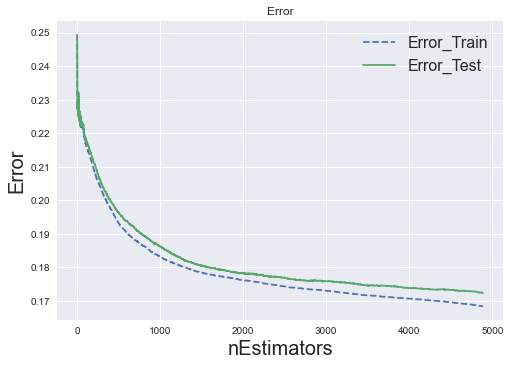

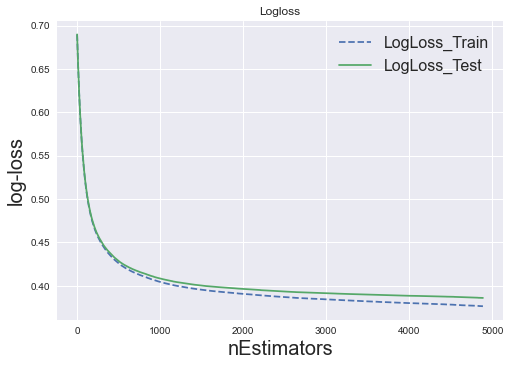

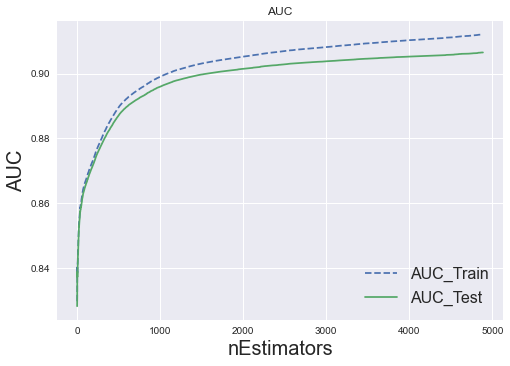

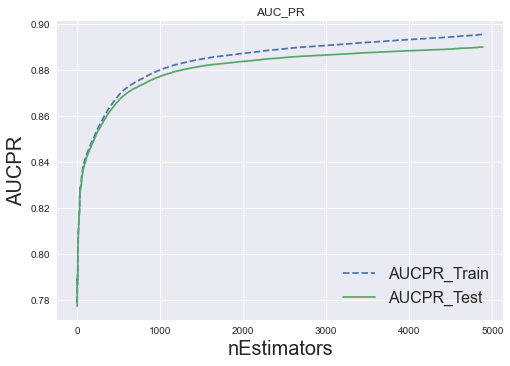

Best score : 0.385821, Best iteration : 4877


<Figure size 576x396 with 0 Axes>

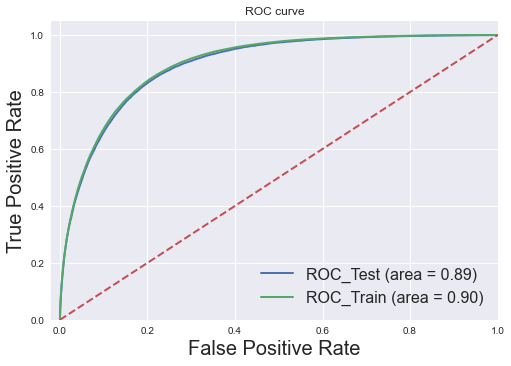

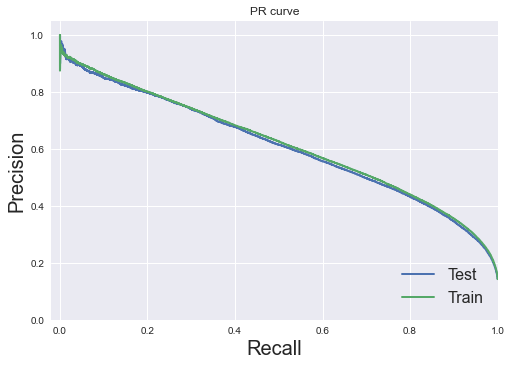

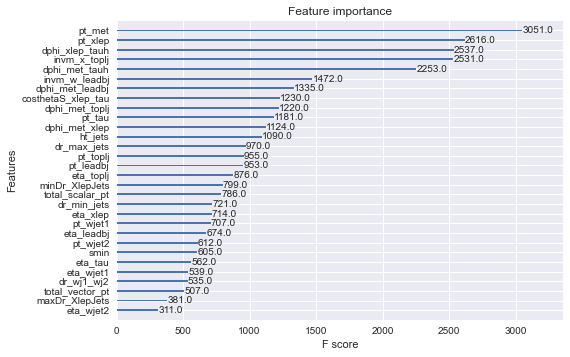

In [31]:
with open(os.path.join('Yamls',f'config_train_MX{M}_{channel}.yaml'),'r') as conf:
    config = yaml.safe_load(conf)
mainkeys    = list(config.keys())
tag         = config.get('Tag')
pwd         = os.getcwd()
tagdir      = os.path.join(pwd,tag)

if not os.path.exists(tag):
    os.mkdir(tagdir)
else:
    print(f'{tagdir} already exists ...')

maintree    = config.get('intree')
infiledict  = config.get('infiles')
#print(infiledict)
clskeys = list(infiledict.keys())
#print(clskeys)
featurelist = config.get('features') 

signaldict = infiledict.get('Signal')
backgrounddict = infiledict.get('Background')


'''
# List of list [['sample1_path',xsec1], ['sample2_path', xsec2], ......]
signal_root_df_list = list(signaldict.values())
background_root_df_list = list(backgrounddict.values())

dfs_signal = []
dfs_background = []
for item in signal_root_df_list:
    path  = item[0]
    clswt = item[1] # xsec
    dfitem = rpd.read_root(path, key=maintree)[featurelist]
    dfitem['tag'] = 1
    dfs_signal.append(dfitem)

for item in background_root_df_list:
    path  = item[0]
    clswt = item[1] # xsec
    dfitem = rpd.read_root(path, key=maintree)[featurelist]
    dfitem['tag'] = 0
    dfs_background.append(dfitem)

print(f'No of signal processes : {len(dfs_signal)}, bkg processes : {len(dfs_background)}')

sigtrain, sigtest   = train_test_split(dfs_signal[0],     test_size=0.2, random_state=42, shuffle=True)
bkg1train, bkg1test = train_test_split(dfs_background[0], test_size=0.2, random_state=42, shuffle=True)
bkg2train, bkg2test = train_test_split(dfs_background[1], test_size=0.2, random_state=42, shuffle=True)
bkg3train, bkg3test = train_test_split(dfs_background[2], test_size=0.2, random_state=42, shuffle=True)
      
df_train = pd.concat([sigtrain,bkg1train,bkg2train,bkg3train])
df_train.sample(frac=1)
df_test  = pd.concat([sigtest,bkg1test,bkg2test,bkg3test])
df_test.sample(frac=1)

# For Correlation matrix #
df_sig = (pd.concat(dfs_signal)).iloc[:,:-1]
df_bkg = (pd.concat(dfs_background)).iloc[:,:-1]
corrlMatrix_sig = df_sig.corr()
corrlMatrix_bkg = df_bkg.corr()

plt.figure(figsize=(15,12.5))
sns.heatmap(corrlMatrix_sig, cmap='YlGnBu', annot=True, annot_kws={'size':13}, fmt='.2f')
plt.title('Correlation Matrix [Signal]')
plt.savefig(os.path.join(tagdir,'Corr_matrix_signal.png'), dpi=300)
plt.show()
plt.clf()
plt.figure(figsize=(15,12.5))
sns.heatmap(corrlMatrix_bkg, cmap='YlGnBu', annot=True, annot_kws={'size':13}, fmt='.2f')
plt.title('Correlation Matrix [Background]')
plt.savefig(os.path.join(tagdir,'Corr_matrix_bkg.png'), dpi=300)
plt.show()
plt.clf()
###########################
'''

signal_info_list     = list(signaldict.values())
background_info_list = list(backgrounddict.values())

dfs_signal     = []
dfs_background = []
for item in signal_info_list:
    path   = item[0]
    xsec   = item[1] # xsec
    nEvProd= item[2]   
    dfitem = rpd.read_root(path, key=maintree)[featurelist]
    dfitem['tag'] = 1
    #dfitem['tag'] = np.ones(dfitem.shape[0])
    #dfitem['wtd_events'] = np.ones(dfitem.shape[0])
    ##dfitem['wtd_events'] = dfitem.shape[0]
    dfitem['wt'] = 1.0/nEvProd
    dfs_signal.append(dfitem)

for item in background_info_list:
    path  = item[0]
    xsec  = item[1] # xsec
    nEvProd= item[2]
    dfitem = rpd.read_root(path, key=maintree)[featurelist]
    #dfitem['tag'] = np.zeros(dfitem.shape[0])
    dfitem['tag'] = 0
    #dfitem['wtd_events'] = xsec*np.ones(dfitem.shape[0])
    #dfitem['wtd_events'] = xsec*dfitem.shape[0]
    dfitem['wt'] = xsec/nEvProd
    dfs_background.append(dfitem)

print(f'No of signal processes : {len(dfs_signal)}, bkg processes : {len(dfs_background)}')
df_total_sig = pd.concat(dfs_signal)
df_total_sig['rel_weight'] = 1.0
totwt = 0.0
for df in dfs_background:
    #print(f'''backgrounddddddd : {df['wt']}  : shape : {df.shape[0]} \n\n''')
    totwt += df['wt'][0] * df.shape[0]

for df in dfs_background:
    df['rel_weight'] = df['wt'] * df.shape[0] / totwt
    
df_total_bkg = pd.concat(dfs_background)      

sigtrain,  sigtest  = train_test_split(df_total_sig,  test_size=0.2,   random_state=42, shuffle=True)
bkgtrain,  bkgtest  = train_test_split(df_total_bkg,  test_size=0.2,   random_state=42, shuffle=True)

df_train = pd.concat([sigtrain,bkgtrain])
df_train.sample(frac=1)
df_test  = pd.concat([sigtest,bkgtest])
df_test.sample(frac=1)

train_weight = df_train [['rel_weight']].to_numpy()
test_weight  = df_test  [['rel_weight']].to_numpy()

df_train = df_train[featurelist + ['tag']]
df_test  = df_test [featurelist + ['tag']]

np_train = df_train.to_numpy()
np_test  = df_test.to_numpy()

x_train = np_train[:,:np_train.shape[1]-1]
y_train = np_train[:,-1]
print(x_train.shape)
x_test  = np_test[:,:np_test.shape[1]-1]
y_test  = np_test[:,-1]
print(x_test.shape)

print(f'Train --> Sig : {np.sum(y_train > 0)}   Bkg : {np.sum(y_train < 1)}')
print(f'Test  --> Sig : {np.sum(y_test > 0)}    Bkg : {np.sum(y_test < 1)}')

#############################################
#############################################
D_train = xgb.DMatrix(x_train, label = y_train, feature_names = featurelist, weight=train_weight)
D_test  = xgb.DMatrix(x_test,  label = y_test, feature_names = featurelist, weight=test_weight)
watchlist = [(D_train, 'train'), (D_test, 'test')]
print(D_train)
#############################################
#############################################
prog = dict()

max_iter = 100
eta_min = 0.001
eta_max = 0.5
eta_decay = np.linspace(eta_min, eta_max, max_iter).tolist()
params = {
        "nthread":-1,
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": ['error','auc','aucpr','logloss'], 
        "eta": 0.01,#0.03 #0.01
        "n_estimators": 500,
        #"tree_method": 'exact',
        #"gpu_id" : -1,
        "tree_method": 'auto',
        #"predictor": "gpu_predictor",
        #"updater": "grow_gpu",
        "max_depth": 3,#3 #2
        "subsample": 1,
        "colsample_bytree": 1,
        "silent": 1,
        "min_child_weight": 1
        #"callbacks": [xgb.callback.LearningRateScheduler(eta_decay)]
    }
num_boost_round = 10000
early_stopping_rounds = 10
#############################################
#############################################
model = xgb.train(params, D_train, num_boost_round, watchlist,
                  early_stopping_rounds=early_stopping_rounds, 
                  evals_result=prog,verbose_eval=True)
#############################################
#############################################
best_tree = model.best_iteration
model.save_model(os.path.join(tagdir,'XGB_test.json'))
model.save_model(os.path.join(tagdir,'XGB_test.model'))
model.dump_model(os.path.join(tagdir,'XGB_dump.txt'))
#############################################
#############################################
preds_train = model.predict(D_train, ntree_limit=model.best_iteration)
preds = model.predict(D_test, ntree_limit=model.best_iteration)
print(preds)
#############################################
#############################################
#result = model.evals_result()
prog['train']['error']
plt.plot(prog['train']['error'], linestyle='dashed',label='Error_Train')
plt.plot(prog['test']['error'], linestyle='solid', label='Error_Test')
plt.title('Error')
plt.legend(loc="upper right", fontsize=16)
plt.xlabel('nEstimators', size=20)
plt.ylabel('Error', size=20)
plt.savefig(os.path.join(tagdir,'Error.png'),dpi=300)
plt.show()
plt.clf()
plt.plot(prog['train']['logloss'], linestyle='dashed',label='LogLoss_Train')
plt.plot(prog['test']['logloss'], linestyle='solid', label='LogLoss_Test')
plt.title('Logloss')
plt.legend(loc="upper right", fontsize=16)
plt.xlabel('nEstimators', size=20)
plt.ylabel('log-loss', size=20)
plt.savefig(os.path.join(tagdir,'LogLoss.png'),dpi=300)
plt.show()
plt.clf()
plt.plot(prog['train']['auc'], linestyle='dashed',label='AUC_Train')
plt.plot(prog['test']['auc'], linestyle='solid', label='AUC_Test')
plt.title('AUC')
plt.legend(loc="lower right", fontsize=16)
plt.xlabel('nEstimators', size=20)
plt.ylabel('AUC', size=20)
plt.savefig(os.path.join(tagdir,'AUC.png'), dpi=300)
plt.show()
plt.clf()
plt.plot(prog['train']['aucpr'], linestyle='dashed',label='AUCPR_Train')
plt.plot(prog['test']['aucpr'], linestyle='solid', label='AUCPR_Test')
plt.title('AUC_PR')
plt.legend(loc="lower right", fontsize=16)
plt.xlabel('nEstimators', size=20)
plt.ylabel('AUCPR', size=20)
plt.savefig(os.path.join(tagdir,'AUCPR.png'), dpi=300)
plt.show()
plt.clf()

print(f'Best score : {model.best_score}, Best iteration : {model.best_iteration}')
#############################################
#############################################
fpr_t, tpr_t, _ = roc_curve(y_train, preds_train)
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc_t = auc(fpr_t, tpr_t)
roc_auc = auc(fpr, tpr)
#xgb.plot_importance(gbm)
#plt.show()
plt.figure()
lw = 2
plt.plot(fpr, tpr,
         lw=lw, label='ROC_Test (area = %0.2f)' % roc_auc)
plt.plot(fpr_t, tpr_t,
         lw=lw, label='ROC_Train (area = %0.2f)' % roc_auc_t)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',size=20)
plt.ylabel('True Positive Rate',size=20)
plt.title('ROC curve')
plt.legend(loc="lower right", fontsize=16)
plt.savefig(os.path.join(tagdir,'ROC.png'), dpi=300)
plt.show()

import csv
fpr_tpr_to_write = list(zip(fpr, tpr))
with open(os.path.join(tagdir,f'ROC_Info_{M}_{channel}.csv'), 'w') as csvf:
    writer = csv.writer(csvf)
    writer.writerows(fpr_tpr_to_write)
#############################################
#############################################
pr_t, rc_t, _ = precision_recall_curve(y_train, preds_train)
pr, rc, _ = precision_recall_curve(y_test, preds)
#auc_t = auc(pr_t, rc_t)
#auc   = auc(pr, rc)
#xgb.plot_importance(gbm)
#plt.show()
plt.figure()
lw = 2
plt.plot(rc, pr, lw=lw, label='Test')
plt.plot(rc_t, pr_t, lw=lw, label='Train')
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall',size=20)
plt.ylabel('Precision',size=20)
plt.title('PR curve')
plt.legend(loc="lower right", fontsize=16)
plt.savefig(os.path.join(tagdir,'PR.png'), dpi=300)
plt.show()
#############################################
#############################################
impplot = xgb.plot_importance(model)
#plot = impplot.plot()
#fig = plot.get_figure()
plt.savefig(os.path.join(tagdir,'feature_importance.png'), dpi=300)
#############################################
#############################################
#xgb.to_graphviz(model, num_tress=2)

# Application

In [32]:
'See `XGBoost_application`'

'See `XGBoost_application`'